**Project: Face Image Retrieval Using Deep Learning Models**

---


**Nhóm KTLT: Khanh Tâm Lâm Thư**

**Lớp: 21KDL1**

# 1. Information

## 1.1. Project Description

Our team is currently working on a project focused on Face Image Retrieval using state-of-the-art Deep Learning Models. The core of our approach involves leveraging Convolutional Neural Networks (CNN) to identify and extract facial features. The project centers around the comprehensive CelebA dataset, which contains a diverse collection of celebrity images.

## 1.2. Team Members

|         Tên         |   MSSV   | % đóng góp |   Ghi chú   |
|:-------------------:|:--------:|:----------:|:-----------:|
|   Trần Mai Chí Tâm  | 21280047 |     25%    | Leader |
|  Ngô Ngọc Hà Khanh  | 21280019 |     25%    |             |
| Nguyễn Đặng Anh Thư | 21280111 |     25%    |             |
|      Y Cao Lâm      | 21280027 |     25%    |             |

# 2. Understanding About Dataset

In [9]:
import pandas as pd
import os, os.path
from os import listdir
import cv2
import numpy as np
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
ROOT = r'Z:\ndm\note'
PATH = r'Z:\ndm\note\img_align_celeba'
from PIL import Image as PILImage  
from IPython.display import Image as IPImage  

## 2.1. Data Reader

In [3]:
os.listdir()

['anno', 'eval', 'img_align_celeba', 'README.txt']

In [4]:
anno_dir = 'anno'
eval_dir = 'eval'

print('anno:', os.listdir(anno_dir))
print('eval:', os.listdir(eval_dir))

anno: ['identity_CelebA.txt', 'list_attr_celeba.txt', 'list_bbox_celeba.txt', 'list_landmarks_align_celeba.txt', 'list_landmarks_celeba.txt']
eval: ['list_eval_partition.txt']


### Read attributes

In [5]:
f = open(os.path.join(anno_dir, 'list_attr_celeba.txt'))
file = f.readlines()
sample = int(file[0])
classes = file[1].split(' ')
classes.pop(-1)
attr = []
for i in file[2:]:
    list_ = i.split()
    list_.pop(0)
    list_ = list(map(int, list_))
    attr.append(list_)

convert the attribute to binary

In [6]:
for li in attr:
    for ind in range(len(li)):
        if(li[ind] == -1):
            li[ind] = 0

### Read eval list

In [7]:
f = open(os.path.join(eval_dir, 'list_eval_partition.txt'))
file = f.readlines()
eval_dict = {'name': [],
        'eval': []}
for i in file:
    key, value = i.split()
    eval_dict['name'].append(key)
    eval_dict['eval'].append(int(value))
eval_dict_csv = pd.DataFrame(eval_dict)

### Read landmark

In [8]:
f = open(os.path.join(anno_dir, "list_landmarks_align_celeba.txt"))
file = f.readlines()
landmark_align = file[1].split() #classes
landmark_align_cor = []
for fi in file[2:]:
    li = list(map(int,fi.split()[1:]))
    landmark_align_cor.append(li)

### Export

In [9]:
df = pd.DataFrame(attr, columns=classes)
df.to_csv('attribute.csv', index=False)
df = pd.DataFrame(landmark_align_cor, columns=landmark_align)
df.to_csv('landmark_align.csv', index=False)
eval_dict_csv.to_csv('eval.csv', index=False)

#### Then we take a look at some of the csv files

andmark_align.csv

In [10]:
landmark_align = pd.read_csv('landmark_align.csv')
landmark_align.head()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,69,109,106,113,77,142,73,152,108,154
1,69,110,107,112,81,135,70,151,108,153
2,76,112,104,106,108,128,74,156,98,158
3,72,113,108,108,101,138,71,155,101,151
4,66,114,112,112,86,119,71,147,104,150


This landmark_align.csv file give us the coordinates for the location of some features like eyes, nose and mouth. We also draw this to beter visualize what we have

In [15]:
landmark_id = pd.read_csv('landmark_align.csv')
landmark_id.insert(0, 'ID', range(0, len(landmark_id)))

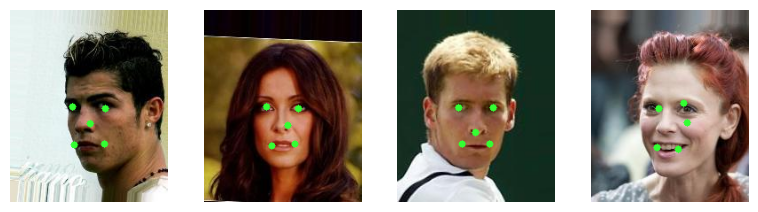

In [28]:
import cv2
import matplotlib.pyplot as plt

def show_images(images):
    num_rows = 4
    num_cols = 16
    plt.figure(figsize=(40, 10))
    plt.subplots_adjust(wspace=0, hspace=0) 
    for i in range(len(images)):
        plt.subplot(num_rows, num_cols, i + 1)
        if images[i].dtype == 'uint8':
             plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
             plt.imshow(images[i])
        plt.axis('off')   
    plt.show()
    
def draw_landmark(df, id, img):
    id = int(id)
    result = df[df['ID'] == id]
    for i in range(1, len(result.columns), 2):
        point_x = int(result.iloc[0, i])
        point_y = int(result.iloc[0, i + 1])
        img = cv2.circle(img, (point_x, point_y), radius=4, color=(51, 255, 51), thickness=-1)
    return img

images=[]
for image in ['128338.jpg', '100120.jpg', '000090.jpg', '000002.jpg']:
    file = os.path.join(PATH, image)
    image_ = cv2.imread(file)
    image_ = draw_landmark(landmark_id, int(image.replace('.jpg', '')), image_)
    images.append(image_)
show_images(images)

#### attribute.csv

In [30]:
attribute = pd.read_csv('attribute.csv')
attribute.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
for col in attribute.columns:
    print(col)

5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young


## 2.2. Exploratory Data Analysis (EDA) 

In this phase of our project, we delve into Exploratory Data Analysis (EDA) to gain insights into the distribution of our dataset. Understanding the distribution is fundamental in shaping our understanding of the data and informing subsequent modeling decisions.

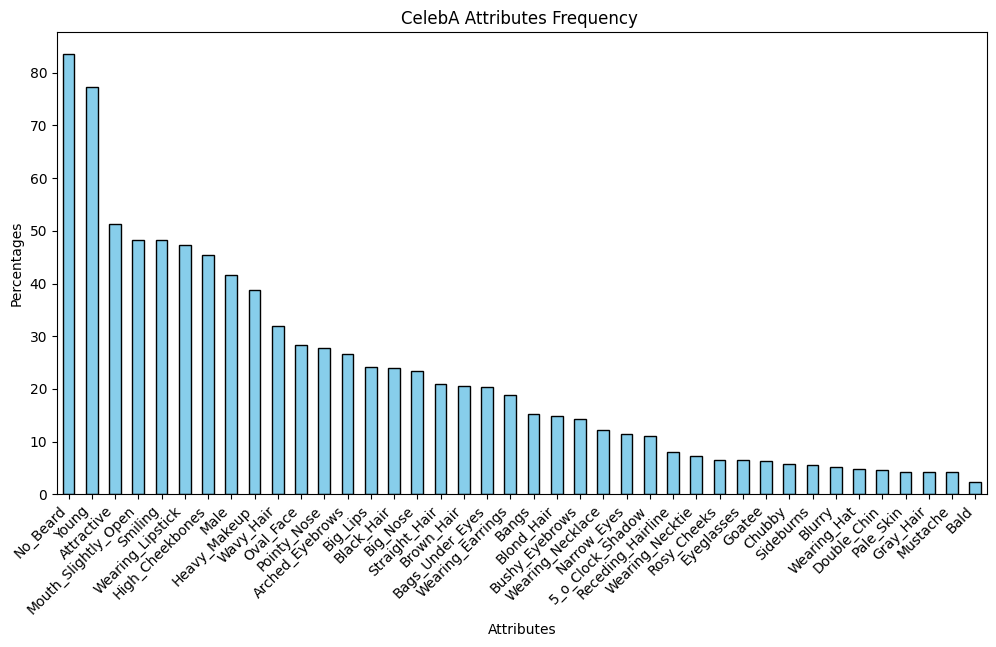

In [36]:
counts = attribute.sum()
percentages = (counts / len(attribute)) * 100
percentages_sorted = percentages.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
percentages_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('CelebA Attributes Frequency ')
plt.xlabel('Attributes')
plt.ylabel('Percentages')
plt.xticks(rotation=45, ha='right')
plt.show()

Overall the dataset is imbalanced

Now let check some of the attributes.

First is the gender

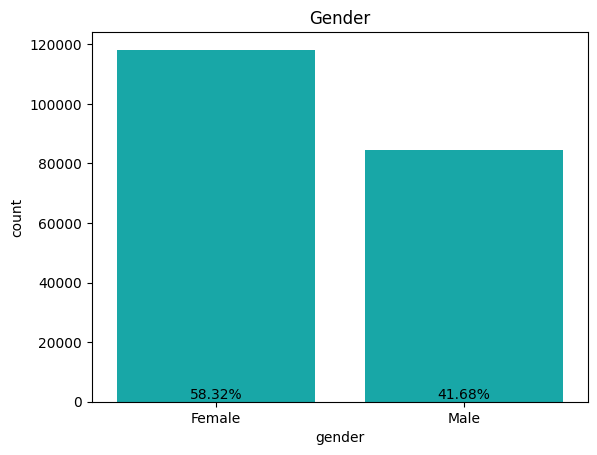

In [44]:
gender_attr = attribute.loc[:, 'Male']
gender_attr = gender_attr.to_frame()
gender_attr.columns = ['gender'] 
gender_attr = gender_attr.replace(1, 'Male')
gender_attr = gender_attr.replace(0, 'Female')
total_count = len(gender_attr)
percentage_male = (gender_attr['gender'] == 'Female').sum() / total_count * 100
percentage_female = (gender_attr['gender'] == 'Male').sum() / total_count * 100
plt.title('Gender')
sns.countplot(x='gender', data=gender_attr, color="c")
plt.text(0, percentage_male, f'{percentage_male:.2f}%', ha='center', va='bottom')
plt.text(1, percentage_female, f'{percentage_female:.2f}%', ha='center', va='bottom')

plt.show()

Although the female take more than half of the dataset. But by the number of images we have, this dataset is still very balance.

Age

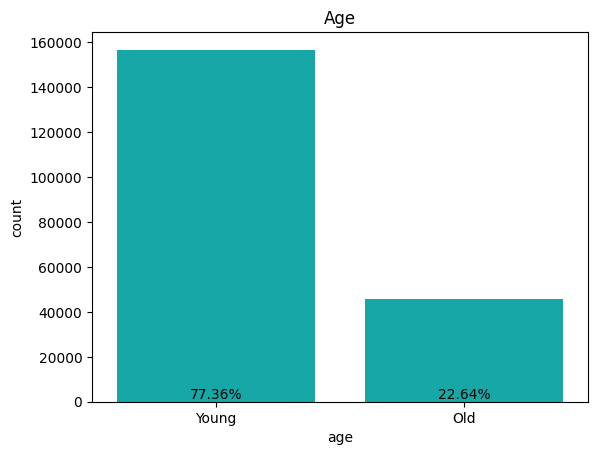

In [42]:
age_attr = attribute.loc[:, 'Young']
age_attr = age_attr.to_frame()
age_attr.columns = ['age'] 
age_attr = age_attr.replace(1, 'Young')
age_attr = age_attr.replace(0, 'Old')
total_count = len(age_attr)
percentage_young = (age_attr['age'] == 'Young').sum() / total_count * 100
percentage_old = (age_attr['age'] == 'Old').sum() / total_count * 100
plt.title('Age')
sns.countplot(x='age', data=age_attr, color="c")
plt.text(0, percentage_young, f'{percentage_young:.2f}%', ha='center', va='bottom')
plt.text(1, percentage_old, f'{percentage_old:.2f}%', ha='center', va='bottom')
plt.show()

Most of the people in the dataset are young, this imbalance could make it harder for the model to know the difference between young and old people

#### Correlation matrix
Now let see the correlation matrix for age and gender

In [45]:
def plotCorrelationMatrix(df, graphWidth):
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

In [46]:
age_attr = attribute.loc[:, 'Young']
gender_attr = attribute.loc[:, 'Male']
age_gender = pd.DataFrame([gender_attr, age_attr])
age_gender = age_gender.T
age_gender.head()

,Male,Young
0,0,1
1,0,1
2,1,1
3,0,1
4,0,1


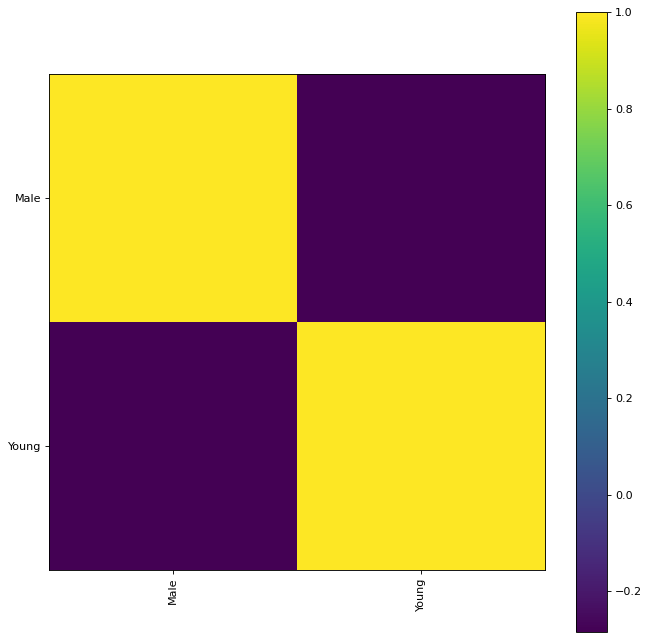

In [47]:
plotCorrelationMatrix(age_gender, 10)

There is little to no relationship between these two attributes

But how about the whole dataset.

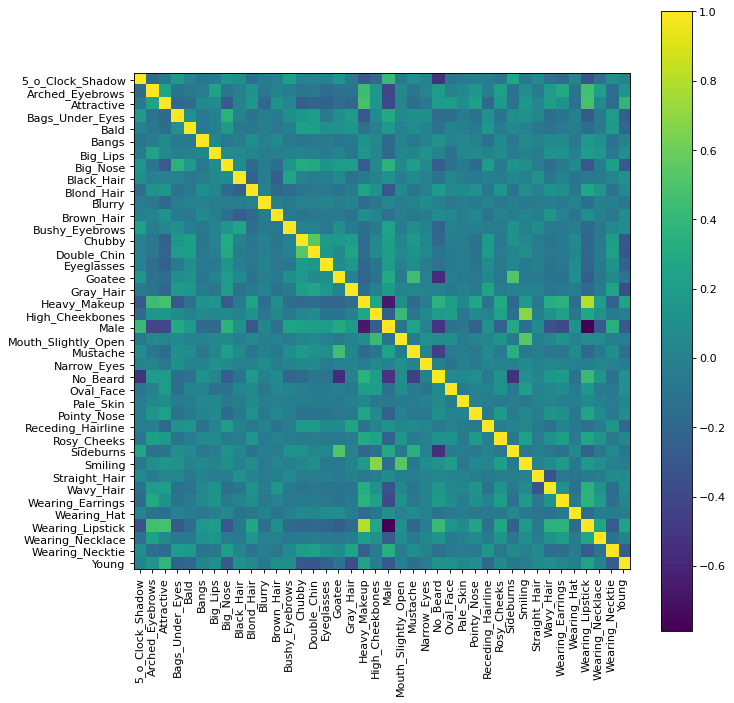

In [48]:
plotCorrelationMatrix(attribute, 10)

Wỉth this correlation matrix we can point out the some stonger relationship, like Heavy_Makeup and Wearing_Lipstick

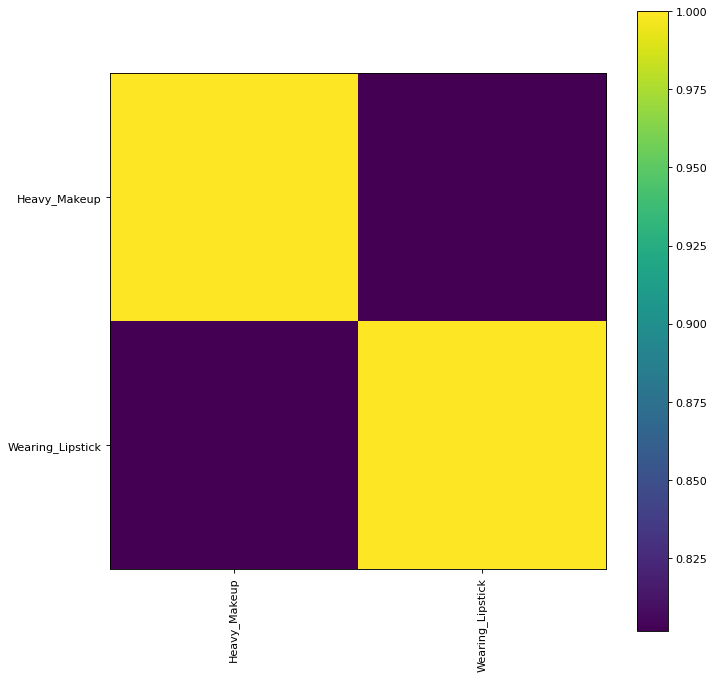

In [49]:
makeup_attr = attribute.loc[:, 'Heavy_Makeup']
lipstick_attr = attribute.loc[:, 'Wearing_Lipstick']
makeup_lipstick = pd.DataFrame([makeup_attr, lipstick_attr])
makeup_lipstick = makeup_lipstick.T
plotCorrelationMatrix(makeup_lipstick, 10)

The correlation is about 80%, which is easy to understand as when people wear heavy makeup they most likely have lipstick on as well

# 3. Modeling And Evaluation

## 3.1. Understanding About Problem

Multi Label Classification

Multiple Labels: Each instance can belong to zero or more classes or categories. This means that an instance can be associated with multiple labels simultaneously.

![image.png](https://editor.analyticsvidhya.com/uploads/62036WhatsApp%20Image%202021-07-19%20at%2014.31.27.jpeg)

Imbalanced Dataset

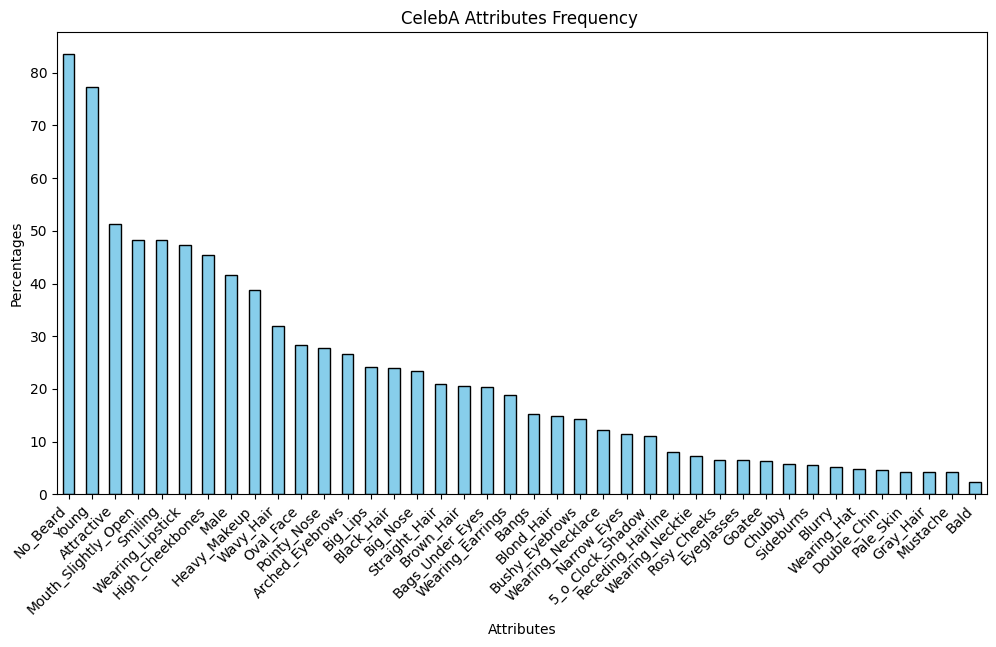

### Library

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
import os
import pandas as pd
from torch.utils.data import random_split
import torch.nn.functional as F
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

## 3.2. Preparation

 build class weights for imbalanced classes

In [2]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer

def generate_class_weights(class_series, class_labels):
    mlb = None
    n_samples = len(class_series)
    n_classes = len(class_series[0])

    class_count = [0] * n_classes
    for classes in class_series:
        for index in range(n_classes):
            if classes[index] != 0:
                class_count[index] += 1
    
    class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
    class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
    return dict(zip(class_labels, class_weights))

#### CelebA Dataset

In [3]:
class CelebADataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform
        self.classes = list(pd.read_csv(label_path).columns)
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = Image.open(self.data[idx]).convert('RGB')
        label = torch.Tensor(self.labels[idx])
        if self.transform:
            img = self.transform(img)
        sample = {'image': img, 'label': label}
        return sample

In [4]:
def CelebA_DataLoader(batch_size, device):
    num_workers = 0 if device.type == 'cuda' else 2
    pin_memory = True if device.type == 'cuda' else False
    classes = train_dataset.classes
    train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, pin_memory=pin_memory,shuffle=True)
    val_loader = DataLoader(val_dataset, num_workers=num_workers, pin_memory=pin_memory, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, num_workers=num_workers, pin_memory=pin_memory, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

#### Directory

In [5]:
image_folder_path = r'Z:\ndm\Img-20240114T105609Z-001\Img\img_align_celeba\img_align_celeba'
label_path = r'attribute.csv'
eval_path = r'eval.csv'

In [6]:
eval_list = pd.read_csv(eval_path)['eval'].values  
eval_name = pd.read_csv(eval_path)['name'].values
labels = pd.read_csv(label_path).values

#### index of evaluation file

In [7]:
indx, indy, recall = [0]*3, [0]*3, 0
for i in eval_list:
    if recall == i - 1:
        recall = i
        indy[recall] += indy[recall - 1] + 1
        indx[recall] = indy[recall]
    else:
        indy[recall] += 1
print(indx,'\n',indy)

[0, 162771, 182638] 
 [162770, 182637, 202599]


We'll reduce the dataset to 50,000 items to save time, as the current volume is quite large.

In [8]:
train_list = [os.path.join(image_folder_path, name) for name in eval_name[indx[0]:50000]]
train_label_list = labels[indx[0]:50000]
val_list = [os.path.join(image_folder_path, name) for name in eval_name[indx[1]:indx[1] + 5000]]
val_label_list = labels[indx[1]:(indx[1] + 5000)]
test_list = [os.path.join(image_folder_path, name) for name in eval_name[indx[2]:indx[2] + 5000]]
test_label_list = labels[indx[2]:(indx[2] + 5000)]

Data Transforms

In [9]:
image_size = (64, 64)
data_transform=transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                          std=[0.5, 0.5, 0.5])
])

In [10]:
train_dataset = CelebADataset(train_list, train_label_list, data_transform)
val_dataset = CelebADataset(val_list, val_label_list, data_transform)
test_dataset = CelebADataset(test_list, test_label_list, data_transform)

calculating class weight

In [82]:
class_weights = generate_class_weights(train_label_list, train_dataset.classes)
class_weights

{0: 0.2255096518130976,
 1: 0.09460379928857943,
 2: 0.04858142246404975,
 3: 0.12315270935960591,
 4: 1.1130899376669634,
 5: 0.16240093542938808,
 6: 0.1044451871657754,
 7: 0.10559216083797938,
 8: 0.1041493084485919,
 9: 0.1696755802904846,
 10: 0.4767353165522502,
 11: 0.1227656648988411,
 12: 0.17470300489168414,
 13: 0.4334257975034674,
 14: 0.5441880713974749,
 15: 0.38461538461538464,
 16: 0.3950695322376738,
 17: 0.6024096385542169,
 18: 0.06502965352200603,
 19: 0.05559508984166518,
 20: 0.05968011458582,
 21: 0.05205080158234437,
 22: 0.6151574803149606,
 23: 0.2132741852926122,
 24: 0.02997961386257345,
 25: 0.08831425745372333,
 26: 0.5781683626271971,
 27: 0.09078364441862154,
 28: 0.31985670419651996,
 29: 0.39123630672926446,
 30: 0.4407616361071932,
 31: 0.05243728500713147,
 32: 0.11974327042820193,
 33: 0.0779982528391364,
 34: 0.13427865506499087,
 35: 0.5087505087505088,
 36: 0.05327309921581998,
 37: 0.20685090186993216,
 38: 0.3404139433551198,
 39: 0.0320159823

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 3.3. Modeling

In [13]:
import torch
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

#### Evaluation


The Hamming score calculates the ratio of the number of correctly predicted labels to the total number of labels, without considering the differences between the prediction and the ground truth for each data sample

In [14]:
def hamming_score(y_true, y_pred):
    num_samples = len(y_true)
    total_correct = 0
    
    for true_labels, pred_labels in zip(y_true, y_pred):
        correct_labels = (true_labels == pred_labels).sum()
        total_correct += correct_labels
    hamming_score = total_correct / (num_samples * len(y_true[0]))
    return hamming_score

def get_multilabel_evaluation(model, test_loader):
    all_predictions = []
    all_targets = []
    model.eval()
    with torch.no_grad():
        for dir_ in test_loader:
            inputs, targets = dir_.values()
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            predictions = (outputs > 0.01).float()
            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(targets.cpu().numpy())
    return all_predictions, all_targets

Plot Evaluation show Losses, Hamming Score of Training and Validation in processing

In [70]:
import matplotlib.pyplot as plt

def plot_evaluation(train_losses, train_hamming_scores, val_losses, val_hamming_scores, precision, recall, f_score):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot Losses
    axes[0].plot(train_losses, label='Train Losses', marker='o')
    axes[0].plot(val_losses, label='Validation Losses', marker='o')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Train and Validation Losses vs. Epochs')
    axes[0].legend()
    axes[0].grid(True)

    # Plot Hamming Scores
    axes[1].plot(train_hamming_scores, label='Train Hamming Scores', marker='o')
    axes[1].plot(val_hamming_scores, label='Validation Hamming Scores', marker='o')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Hamming Score')
    axes[1].set_title('Train and Validation Hamming Scores')
    axes[1].legend()
    axes[1].grid(True)

    # Plot Precision, Recall, F-Score
    metrics = ['Precision', 'Recall', 'F-Score']
    values = [precision, recall, f_score]
    axes[2].bar(metrics, values, color=['blue', 'green', 'red'])
    axes[2].set_title('Score')
    axes[2].set_ylabel('Score')
    axes[2].grid(axis='y')
    axes[2].set_ylim(0, 1) 

    plt.tight_layout()
    plt.show()


#### Model Training

In [16]:
from tqdm import tqdm

def train_model(model, device, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    train_losses = []
    train_hamming_scores = []
    val_losses = []
    val_hamming_scores = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        total_train_loss = 0
        
        train_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')
        for dict_ in train_bar:
            inputs, labels = dict_.values()
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            predicted_labels = (outputs > 0.5).float()
            hamming_score_value = hamming_score(labels.cpu().numpy(), predicted_labels.cpu().numpy())
            train_bar.set_postfix(loss=loss.item(), hamming_score=hamming_score_value)
            
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        train_hamming_scores.append(hamming_score_value)

        model.eval()
        total_val_loss = 0
        
        with torch.no_grad():
            for dict_ in val_loader:
                inputs, labels = dict_.values()
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item() * inputs.size(0)

                predicted_labels = (outputs > 0.5).float()
                val_hamming_score = hamming_score(labels.cpu().numpy(), predicted_labels.cpu().numpy())

        val_loss = total_val_loss / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_hamming_scores.append(val_hamming_score)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Hamming Score: {hamming_score_value:.4f}, Val Loss: {val_loss:.4f}, Val Hamming Score: {val_hamming_score:.4f}")
    
    return [train_losses, train_hamming_scores, val_losses, val_hamming_scores]

To train the model, we will utilize the ResNet50 architecture with default weights.

Additionally, we'll apply precomputed class weights to handle any class imbalances. We'll then establish evaluation metrics to assess the training process and determine which parameters perform the best.

This process will span 10 epochs, iterating through both the training loader and validation loader.

In [17]:
def define_model(train_loader, val_loader, learning_rate, num_features, dropout_prob, device):
    Model = resnet50(weights=ResNet50_Weights.DEFAULT)
    Model.fc = nn.Sequential(
        nn.Linear(Model.fc.in_features, num_features),
        nn.ReLU(inplace=True),
        nn.Dropout(dropout_prob),
        nn.Linear(num_features, len(train_dataset.classes))
    )
    Model = Model.to(device)
    weight_tensor = torch.tensor(list(class_weights.values()), dtype=torch.float).to(device)
    criterion = nn.BCEWithLogitsLoss(weight=weight_tensor)    
    optimizer = optim.Adam(Model.parameters(), lr=learning_rate)
    Metric = []
    Metric.append(train_model(Model, device, train_loader, val_loader, criterion, optimizer, num_epochs=10))

    true, pred = get_multilabel_evaluation(Model, test_loader) 
    predictions_np = np.concatenate(pred)
    targets_np = np.concatenate(true)
    precision, recall, f_score, _ = precision_recall_fscore_support(targets_np, predictions_np, average='weighted')
    Metric.append([precision, recall, f_score])
    return Model, Metric

## 3.4. Activation maps

In [140]:
import matplotlib.pyplot as plt
    
def get_activation_maps(model, input_image):
    activation_maps = []
    activations = []
    def hook(module, input, output):
        activations.append(output)
    hooks = []
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            hooks.append(layer.register_forward_hook(hook))
    with torch.no_grad():
        _ = model(input_image)
    for activation in activations:
        activation_maps.append(activation.squeeze().cpu())
    for hook in hooks:
        hook.remove()
    return activation_maps

In [141]:
Model = resnet50(weights=ResNet50_Weights.DEFAULT)
Model.eval()
image = Image.open(image_path).convert("RGB")
image_tensor = data_transform(image)
image_tensor = image_tensor.unsqueeze(0)  
activation_maps = get_activation_maps(Model, image_tensor)

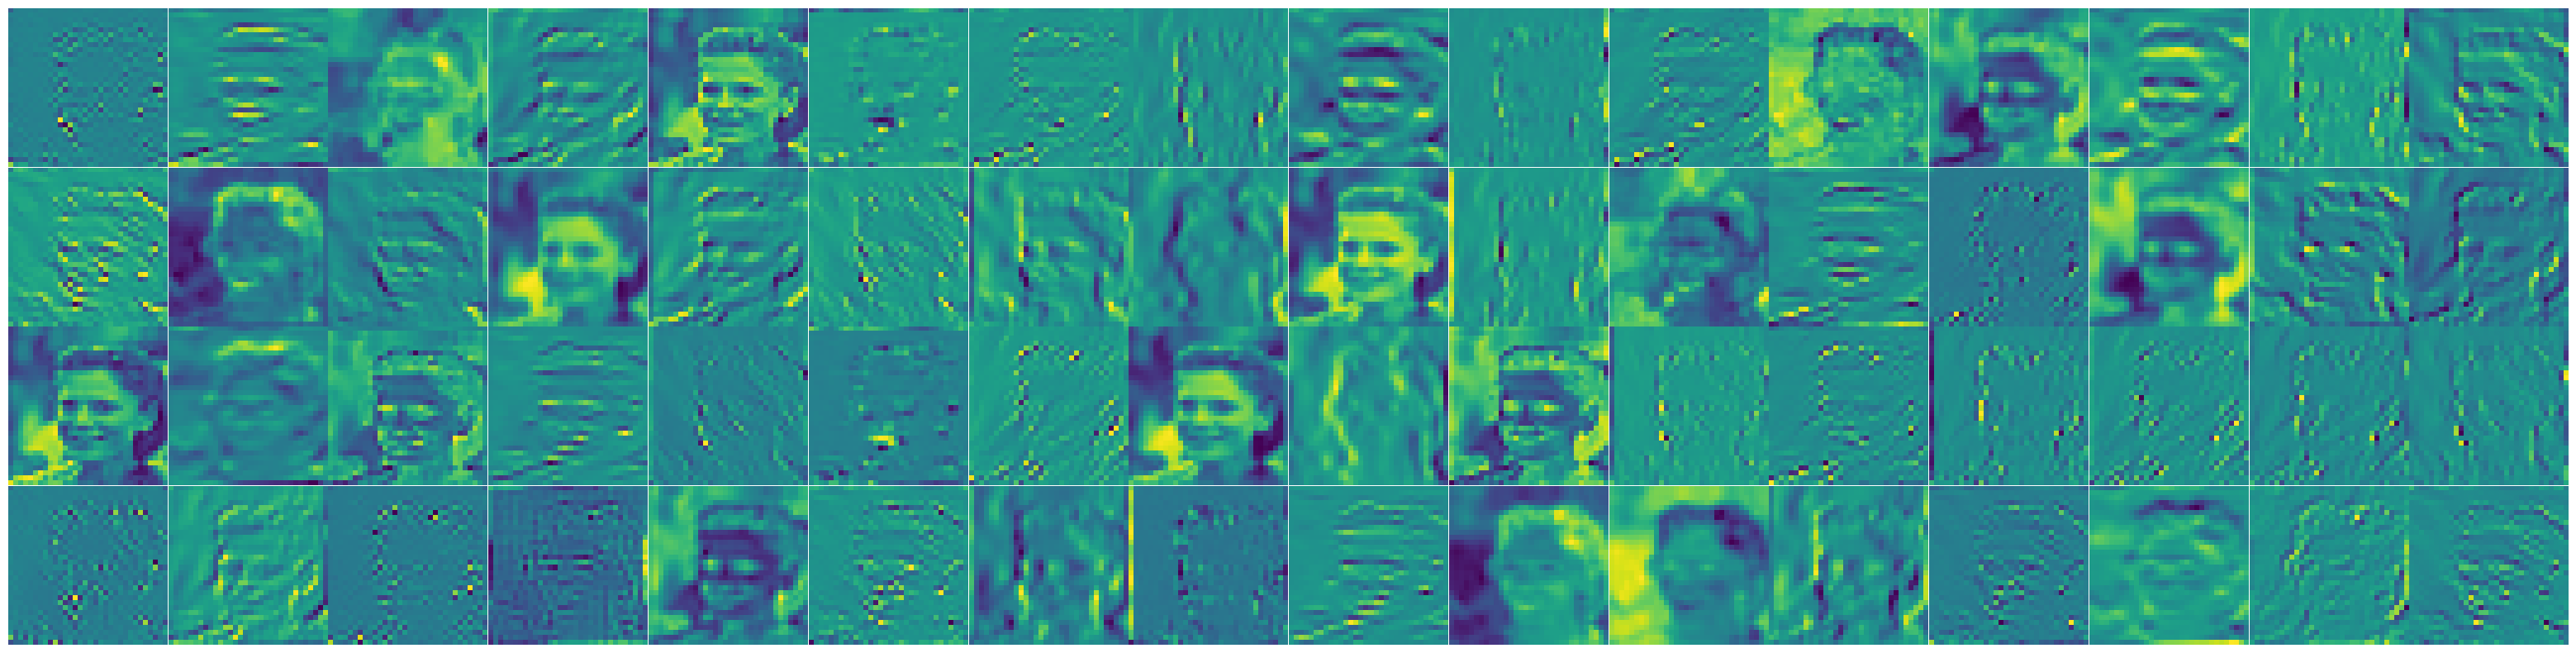

In [142]:
show_images(activation_maps[0])

By examining the activation maps at different convolutional layers, you can identify specific features that the neural network has found in the images.

## 3.5. Tuning Hyperparameter

We will perform fine-tuning to find the parameters that the model performs best on

In [18]:
parameters = {
    'batch_size': [64, 128],
    'learning_rate': [0.01, 0.001],
    'num_features': [512, 1024],
    'drop_out': [0.2, 0.5]
}

In [21]:
Metric = {}

for batch_size in parameters['batch_size']:
    train_loader, val_loader, test_loader = CelebA_DataLoader(batch_size, device)
    for learning_rate in parameters['learning_rate']:
        for num_features in parameters['num_features']:
            for drop_out in parameters['drop_out']:
                name_ = 'CelebA' + '_' + str(batch_size) + '_' + str(learning_rate) + '_' + str(num_features) + '_' + str(drop_out) + '.pth'
                print(f'Model: | batch_size = {batch_size} learning_rate = {learning_rate}, num_features = {num_features}, drop_out = {drop_out} |')
                Model, Metric[name_] = define_model(train_loader, val_loader, learning_rate, num_features, drop_out, device)
                torch.save(Model.state_dict(), name_)

Model: | batch_size = 64 learning_rate = 0.01, num_features = 512, drop_out = 0.2 |


Epoch 1/10: 100%|███████████| 157/157 [00:21<00:00,  7.19batch/s, hamming_score=0.805, loss=0.0757]


Epoch [1/10], Train Loss: 0.0731, Train Hamming Score: 0.8047, Val Loss: 0.0699, Val Hamming Score: 0.8141


Epoch 2/10: 100%|████████████| 157/157 [00:21<00:00,  7.20batch/s, hamming_score=0.82, loss=0.0677]


Epoch [2/10], Train Loss: 0.0652, Train Hamming Score: 0.8203, Val Loss: 0.0794, Val Hamming Score: 0.8141


Epoch 3/10: 100%|████████████| 157/157 [00:21<00:00,  7.19batch/s, hamming_score=0.85, loss=0.0506]


Epoch [3/10], Train Loss: 0.0589, Train Hamming Score: 0.8500, Val Loss: 0.0597, Val Hamming Score: 0.8281


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  7.02batch/s, hamming_score=0.828, loss=0.0656]


Epoch [4/10], Train Loss: 0.0566, Train Hamming Score: 0.8281, Val Loss: 0.1245, Val Hamming Score: 0.8203


Epoch 5/10: 100%|████████████| 157/157 [00:22<00:00,  7.13batch/s, hamming_score=0.853, loss=0.047]


Epoch [5/10], Train Loss: 0.0544, Train Hamming Score: 0.8531, Val Loss: 0.0565, Val Hamming Score: 0.8438


Epoch 6/10: 100%|███████████| 157/157 [00:21<00:00,  7.15batch/s, hamming_score=0.838, loss=0.0626]


Epoch [6/10], Train Loss: 0.0573, Train Hamming Score: 0.8375, Val Loss: 0.0576, Val Hamming Score: 0.8516


Epoch 7/10: 100%|███████████| 157/157 [00:21<00:00,  7.15batch/s, hamming_score=0.838, loss=0.0453]


Epoch [7/10], Train Loss: 0.0559, Train Hamming Score: 0.8375, Val Loss: 0.0731, Val Hamming Score: 0.8469


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  7.11batch/s, hamming_score=0.852, loss=0.0439]


Epoch [8/10], Train Loss: 0.0537, Train Hamming Score: 0.8516, Val Loss: 0.0540, Val Hamming Score: 0.8375


Epoch 9/10: 100%|███████████| 157/157 [00:22<00:00,  7.11batch/s, hamming_score=0.842, loss=0.0531]


Epoch [9/10], Train Loss: 0.0513, Train Hamming Score: 0.8422, Val Loss: 0.0532, Val Hamming Score: 0.8484


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  7.09batch/s, hamming_score=0.831, loss=0.0638]


Epoch [10/10], Train Loss: 0.0507, Train Hamming Score: 0.8313, Val Loss: 0.0527, Val Hamming Score: 0.8469


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: | batch_size = 64 learning_rate = 0.01, num_features = 512, drop_out = 0.5 |


Epoch 1/10: 100%|███████████| 157/157 [00:22<00:00,  7.07batch/s, hamming_score=0.802, loss=0.0868]


Epoch [1/10], Train Loss: 0.0770, Train Hamming Score: 0.8016, Val Loss: 0.0778, Val Hamming Score: 0.8125


Epoch 2/10: 100%|███████████| 157/157 [00:22<00:00,  7.07batch/s, hamming_score=0.827, loss=0.0543]


Epoch [2/10], Train Loss: 0.0687, Train Hamming Score: 0.8266, Val Loss: 0.0682, Val Hamming Score: 0.8344


Epoch 3/10: 100%|███████████| 157/157 [00:22<00:00,  7.05batch/s, hamming_score=0.842, loss=0.0688]


Epoch [3/10], Train Loss: 0.0634, Train Hamming Score: 0.8422, Val Loss: 0.1136, Val Hamming Score: 0.8094


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  7.02batch/s, hamming_score=0.847, loss=0.0608]


Epoch [4/10], Train Loss: 0.0608, Train Hamming Score: 0.8469, Val Loss: 0.0645, Val Hamming Score: 0.8422


Epoch 5/10: 100%|███████████| 157/157 [00:22<00:00,  7.06batch/s, hamming_score=0.806, loss=0.0577]


Epoch [5/10], Train Loss: 0.0580, Train Hamming Score: 0.8063, Val Loss: 0.0573, Val Hamming Score: 0.8328


Epoch 6/10: 100%|███████████| 157/157 [00:22<00:00,  6.99batch/s, hamming_score=0.841, loss=0.0663]


Epoch [6/10], Train Loss: 0.0557, Train Hamming Score: 0.8406, Val Loss: 0.0619, Val Hamming Score: 0.8391


Epoch 7/10: 100%|███████████| 157/157 [00:22<00:00,  7.06batch/s, hamming_score=0.828, loss=0.0598]


Epoch [7/10], Train Loss: 0.0572, Train Hamming Score: 0.8281, Val Loss: 0.0581, Val Hamming Score: 0.8375


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  7.07batch/s, hamming_score=0.797, loss=0.0739]


Epoch [8/10], Train Loss: 0.0569, Train Hamming Score: 0.7969, Val Loss: 0.0547, Val Hamming Score: 0.8438


Epoch 9/10: 100%|███████████| 157/157 [00:22<00:00,  7.02batch/s, hamming_score=0.858, loss=0.0482]


Epoch [9/10], Train Loss: 0.0547, Train Hamming Score: 0.8578, Val Loss: 0.0537, Val Hamming Score: 0.8422


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  7.04batch/s, hamming_score=0.848, loss=0.0704]


Epoch [10/10], Train Loss: 0.0536, Train Hamming Score: 0.8484, Val Loss: 0.0532, Val Hamming Score: 0.8391


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: | batch_size = 64 learning_rate = 0.01, num_features = 1024, drop_out = 0.2 |


Epoch 1/10: 100%|████████████| 157/157 [00:22<00:00,  6.97batch/s, hamming_score=0.82, loss=0.0614]


Epoch [1/10], Train Loss: 0.0670, Train Hamming Score: 0.8203, Val Loss: 0.0573, Val Hamming Score: 0.8375


Epoch 2/10: 100%|██████████████| 157/157 [00:22<00:00,  6.89batch/s, hamming_score=0.83, loss=0.06]


Epoch [2/10], Train Loss: 0.0536, Train Hamming Score: 0.8297, Val Loss: 0.0549, Val Hamming Score: 0.8391


Epoch 3/10: 100%|███████████| 157/157 [00:22<00:00,  6.98batch/s, hamming_score=0.844, loss=0.0597]


Epoch [3/10], Train Loss: 0.0500, Train Hamming Score: 0.8438, Val Loss: 0.0505, Val Hamming Score: 0.8609


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  7.02batch/s, hamming_score=0.878, loss=0.0387]


Epoch [4/10], Train Loss: 0.0475, Train Hamming Score: 0.8781, Val Loss: 0.0488, Val Hamming Score: 0.8531


Epoch 5/10: 100%|███████████| 157/157 [00:22<00:00,  7.04batch/s, hamming_score=0.881, loss=0.0342]


Epoch [5/10], Train Loss: 0.0457, Train Hamming Score: 0.8812, Val Loss: 0.0476, Val Hamming Score: 0.8609


Epoch 6/10: 100%|███████████| 157/157 [00:22<00:00,  6.99batch/s, hamming_score=0.863, loss=0.0545]


Epoch [6/10], Train Loss: 0.0448, Train Hamming Score: 0.8625, Val Loss: 0.0472, Val Hamming Score: 0.8656


Epoch 7/10: 100%|███████████| 157/157 [00:22<00:00,  6.97batch/s, hamming_score=0.887, loss=0.0402]


Epoch [7/10], Train Loss: 0.0433, Train Hamming Score: 0.8875, Val Loss: 0.0481, Val Hamming Score: 0.8750


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.863, loss=0.0635]


Epoch [8/10], Train Loss: 0.0422, Train Hamming Score: 0.8625, Val Loss: 0.0456, Val Hamming Score: 0.8797


Epoch 9/10: 100%|████████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.875, loss=0.038]


Epoch [9/10], Train Loss: 0.0415, Train Hamming Score: 0.8750, Val Loss: 0.0466, Val Hamming Score: 0.8797


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  6.98batch/s, hamming_score=0.866, loss=0.0384]


Epoch [10/10], Train Loss: 0.0400, Train Hamming Score: 0.8656, Val Loss: 0.0455, Val Hamming Score: 0.8781


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: | batch_size = 64 learning_rate = 0.01, num_features = 1024, drop_out = 0.5 |


Epoch 1/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.825, loss=0.0561]


Epoch [1/10], Train Loss: 0.0677, Train Hamming Score: 0.8250, Val Loss: 0.1674, Val Hamming Score: 0.8313


Epoch 2/10: 100%|███████████| 157/157 [00:22<00:00,  7.04batch/s, hamming_score=0.848, loss=0.0499]


Epoch [2/10], Train Loss: 0.0590, Train Hamming Score: 0.8484, Val Loss: 0.6921, Val Hamming Score: 0.8109


Epoch 3/10: 100%|████████████| 157/157 [00:22<00:00,  6.91batch/s, hamming_score=0.83, loss=0.0618]


Epoch [3/10], Train Loss: 0.0570, Train Hamming Score: 0.8297, Val Loss: 0.0544, Val Hamming Score: 0.8484


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  6.94batch/s, hamming_score=0.834, loss=0.0493]


Epoch [4/10], Train Loss: 0.0540, Train Hamming Score: 0.8344, Val Loss: 0.0529, Val Hamming Score: 0.8531


Epoch 5/10: 100%|███████████| 157/157 [00:22<00:00,  6.96batch/s, hamming_score=0.836, loss=0.0609]


Epoch [5/10], Train Loss: 0.0536, Train Hamming Score: 0.8359, Val Loss: 0.1815, Val Hamming Score: 0.8016


Epoch 6/10: 100%|███████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.811, loss=0.0567]


Epoch [6/10], Train Loss: 0.0585, Train Hamming Score: 0.8109, Val Loss: 0.0559, Val Hamming Score: 0.8391


Epoch 7/10: 100%|███████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.836, loss=0.0575]


Epoch [7/10], Train Loss: 0.0547, Train Hamming Score: 0.8359, Val Loss: 0.0530, Val Hamming Score: 0.8391


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  6.97batch/s, hamming_score=0.852, loss=0.0563]


Epoch [8/10], Train Loss: 0.0532, Train Hamming Score: 0.8516, Val Loss: 0.0529, Val Hamming Score: 0.8500


Epoch 9/10: 100%|███████████| 157/157 [00:22<00:00,  6.96batch/s, hamming_score=0.839, loss=0.0517]


Epoch [9/10], Train Loss: 0.0523, Train Hamming Score: 0.8391, Val Loss: 0.0604, Val Hamming Score: 0.8391


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  7.02batch/s, hamming_score=0.844, loss=0.0594]


Epoch [10/10], Train Loss: 0.0508, Train Hamming Score: 0.8438, Val Loss: 0.0494, Val Hamming Score: 0.8594


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: | batch_size = 64 learning_rate = 0.001, num_features = 512, drop_out = 0.2 |


Epoch 1/10: 100%|███████████| 157/157 [00:22<00:00,  7.05batch/s, hamming_score=0.877, loss=0.0485]


Epoch [1/10], Train Loss: 0.0530, Train Hamming Score: 0.8766, Val Loss: 0.0426, Val Hamming Score: 0.8797


Epoch 2/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.887, loss=0.0437]


Epoch [2/10], Train Loss: 0.0393, Train Hamming Score: 0.8875, Val Loss: 0.0410, Val Hamming Score: 0.8750


Epoch 3/10: 100%|███████████| 157/157 [00:22<00:00,  7.05batch/s, hamming_score=0.906, loss=0.0306]


Epoch [3/10], Train Loss: 0.0347, Train Hamming Score: 0.9062, Val Loss: 0.0454, Val Hamming Score: 0.8766


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.897, loss=0.0265]


Epoch [4/10], Train Loss: 0.0310, Train Hamming Score: 0.8969, Val Loss: 0.0419, Val Hamming Score: 0.8828


Epoch 5/10: 100%|█████████████| 157/157 [00:22<00:00,  7.05batch/s, hamming_score=0.9, loss=0.0327]


Epoch [5/10], Train Loss: 0.0284, Train Hamming Score: 0.9000, Val Loss: 0.0423, Val Hamming Score: 0.8922


Epoch 6/10: 100%|███████████| 157/157 [00:22<00:00,  7.06batch/s, hamming_score=0.925, loss=0.0245]


Epoch [6/10], Train Loss: 0.0254, Train Hamming Score: 0.9250, Val Loss: 0.0474, Val Hamming Score: 0.8859


Epoch 7/10: 100%|████████████| 157/157 [00:22<00:00,  7.04batch/s, hamming_score=0.903, loss=0.023]


Epoch [7/10], Train Loss: 0.0236, Train Hamming Score: 0.9031, Val Loss: 0.0466, Val Hamming Score: 0.8969


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.909, loss=0.0216]


Epoch [8/10], Train Loss: 0.0209, Train Hamming Score: 0.9094, Val Loss: 0.0500, Val Hamming Score: 0.8859


Epoch 9/10: 100%|███████████| 157/157 [00:22<00:00,  7.07batch/s, hamming_score=0.923, loss=0.0227]


Epoch [9/10], Train Loss: 0.0189, Train Hamming Score: 0.9234, Val Loss: 0.0500, Val Hamming Score: 0.8906


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  7.04batch/s, hamming_score=0.909, loss=0.0226]


Epoch [10/10], Train Loss: 0.0171, Train Hamming Score: 0.9094, Val Loss: 0.0517, Val Hamming Score: 0.8938
Model: | batch_size = 64 learning_rate = 0.001, num_features = 512, drop_out = 0.5 |


Epoch 1/10: 100%|███████████| 157/157 [00:22<00:00,  7.05batch/s, hamming_score=0.863, loss=0.0479]


Epoch [1/10], Train Loss: 0.0552, Train Hamming Score: 0.8625, Val Loss: 0.0439, Val Hamming Score: 0.8766


Epoch 2/10: 100%|████████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.847, loss=0.053]


Epoch [2/10], Train Loss: 0.0419, Train Hamming Score: 0.8469, Val Loss: 0.0437, Val Hamming Score: 0.8828


Epoch 3/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.867, loss=0.0412]


Epoch [3/10], Train Loss: 0.0374, Train Hamming Score: 0.8672, Val Loss: 0.0417, Val Hamming Score: 0.8953


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  7.06batch/s, hamming_score=0.884, loss=0.0406]


Epoch [4/10], Train Loss: 0.0346, Train Hamming Score: 0.8844, Val Loss: 0.0405, Val Hamming Score: 0.8906


Epoch 5/10: 100%|███████████| 157/157 [00:22<00:00,  7.04batch/s, hamming_score=0.887, loss=0.0341]


Epoch [5/10], Train Loss: 0.0321, Train Hamming Score: 0.8875, Val Loss: 0.0453, Val Hamming Score: 0.8797


Epoch 6/10: 100%|████████████| 157/157 [00:22<00:00,  7.02batch/s, hamming_score=0.877, loss=0.035]


Epoch [6/10], Train Loss: 0.0301, Train Hamming Score: 0.8766, Val Loss: 0.0423, Val Hamming Score: 0.8828


Epoch 7/10: 100%|███████████| 157/157 [00:22<00:00,  7.04batch/s, hamming_score=0.887, loss=0.0298]


Epoch [7/10], Train Loss: 0.0280, Train Hamming Score: 0.8875, Val Loss: 0.0482, Val Hamming Score: 0.8703


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.898, loss=0.0233]


Epoch [8/10], Train Loss: 0.0263, Train Hamming Score: 0.8984, Val Loss: 0.0443, Val Hamming Score: 0.8969


Epoch 9/10: 100%|███████████| 157/157 [00:22<00:00,  7.01batch/s, hamming_score=0.898, loss=0.0355]


Epoch [9/10], Train Loss: 0.0242, Train Hamming Score: 0.8984, Val Loss: 0.0470, Val Hamming Score: 0.8891


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  7.05batch/s, hamming_score=0.898, loss=0.0306]


Epoch [10/10], Train Loss: 0.0233, Train Hamming Score: 0.8984, Val Loss: 0.0493, Val Hamming Score: 0.8891
Model: | batch_size = 64 learning_rate = 0.001, num_features = 1024, drop_out = 0.2 |


Epoch 1/10: 100%|███████████| 157/157 [00:22<00:00,  7.01batch/s, hamming_score=0.864, loss=0.0409]


Epoch [1/10], Train Loss: 0.0515, Train Hamming Score: 0.8641, Val Loss: 0.0434, Val Hamming Score: 0.9031


Epoch 2/10: 100%|███████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.897, loss=0.0409]


Epoch [2/10], Train Loss: 0.0387, Train Hamming Score: 0.8969, Val Loss: 0.0410, Val Hamming Score: 0.8688


Epoch 3/10: 100%|███████████| 157/157 [00:22<00:00,  7.01batch/s, hamming_score=0.875, loss=0.0394]


Epoch [3/10], Train Loss: 0.0341, Train Hamming Score: 0.8750, Val Loss: 0.0438, Val Hamming Score: 0.8906


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  6.98batch/s, hamming_score=0.916, loss=0.0324]


Epoch [4/10], Train Loss: 0.0307, Train Hamming Score: 0.9156, Val Loss: 0.0415, Val Hamming Score: 0.9016


Epoch 5/10: 100%|█████████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.9, loss=0.0307]


Epoch [5/10], Train Loss: 0.0274, Train Hamming Score: 0.9000, Val Loss: 0.0443, Val Hamming Score: 0.8859


Epoch 6/10: 100%|███████████| 157/157 [00:22<00:00,  7.01batch/s, hamming_score=0.903, loss=0.0318]


Epoch [6/10], Train Loss: 0.0255, Train Hamming Score: 0.9031, Val Loss: 0.0608, Val Hamming Score: 0.8875


Epoch 7/10: 100%|████████████| 157/157 [00:22<00:00,  6.99batch/s, hamming_score=0.898, loss=0.028]


Epoch [7/10], Train Loss: 0.0226, Train Hamming Score: 0.8984, Val Loss: 0.0457, Val Hamming Score: 0.8859


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  7.01batch/s, hamming_score=0.909, loss=0.0189]


Epoch [8/10], Train Loss: 0.0207, Train Hamming Score: 0.9094, Val Loss: 0.0505, Val Hamming Score: 0.8953


Epoch 9/10: 100%|███████████| 157/157 [00:22<00:00,  6.98batch/s, hamming_score=0.909, loss=0.0181]


Epoch [9/10], Train Loss: 0.0183, Train Hamming Score: 0.9094, Val Loss: 0.0527, Val Hamming Score: 0.8797


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.939, loss=0.0162]


Epoch [10/10], Train Loss: 0.0162, Train Hamming Score: 0.9391, Val Loss: 0.0555, Val Hamming Score: 0.8812
Model: | batch_size = 64 learning_rate = 0.001, num_features = 1024, drop_out = 0.5 |


Epoch 1/10: 100%|███████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.836, loss=0.0488]


Epoch [1/10], Train Loss: 0.0534, Train Hamming Score: 0.8359, Val Loss: 0.0474, Val Hamming Score: 0.8781


Epoch 2/10: 100%|███████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.884, loss=0.0376]


Epoch [2/10], Train Loss: 0.0407, Train Hamming Score: 0.8844, Val Loss: 0.0419, Val Hamming Score: 0.8938


Epoch 3/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.898, loss=0.0357]


Epoch [3/10], Train Loss: 0.0362, Train Hamming Score: 0.8984, Val Loss: 0.0406, Val Hamming Score: 0.8984


Epoch 4/10: 100%|███████████| 157/157 [00:22<00:00,  7.01batch/s, hamming_score=0.877, loss=0.0377]


Epoch [4/10], Train Loss: 0.0329, Train Hamming Score: 0.8766, Val Loss: 0.0425, Val Hamming Score: 0.8953


Epoch 5/10: 100%|███████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.897, loss=0.0339]


Epoch [5/10], Train Loss: 0.0303, Train Hamming Score: 0.8969, Val Loss: 0.0433, Val Hamming Score: 0.8875


Epoch 6/10: 100%|███████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.898, loss=0.0317]


Epoch [6/10], Train Loss: 0.0281, Train Hamming Score: 0.8984, Val Loss: 0.0448, Val Hamming Score: 0.9062


Epoch 7/10: 100%|███████████| 157/157 [00:22<00:00,  7.02batch/s, hamming_score=0.906, loss=0.0255]


Epoch [7/10], Train Loss: 0.0257, Train Hamming Score: 0.9062, Val Loss: 0.0448, Val Hamming Score: 0.8938


Epoch 8/10: 100%|███████████| 157/157 [00:22<00:00,  7.03batch/s, hamming_score=0.914, loss=0.0219]


Epoch [8/10], Train Loss: 0.0238, Train Hamming Score: 0.9141, Val Loss: 0.0457, Val Hamming Score: 0.8875


Epoch 9/10: 100%|███████████| 157/157 [00:22<00:00,  6.98batch/s, hamming_score=0.923, loss=0.0249]


Epoch [9/10], Train Loss: 0.0219, Train Hamming Score: 0.9234, Val Loss: 0.0490, Val Hamming Score: 0.8922


Epoch 10/10: 100%|██████████| 157/157 [00:22<00:00,  7.00batch/s, hamming_score=0.902, loss=0.0244]


Epoch [10/10], Train Loss: 0.0200, Train Hamming Score: 0.9016, Val Loss: 0.0490, Val Hamming Score: 0.8891
Model: | batch_size = 128 learning_rate = 0.01, num_features = 512, drop_out = 0.2 |


Epoch 1/10: 100%|██████████████| 79/79 [00:19<00:00,  4.07batch/s, hamming_score=0.83, loss=0.0507]


Epoch [1/10], Train Loss: 0.0763, Train Hamming Score: 0.8297, Val Loss: 0.0646, Val Hamming Score: 0.8297


Epoch 2/10: 100%|██████████████| 79/79 [00:19<00:00,  4.06batch/s, hamming_score=0.83, loss=0.0715]


Epoch [2/10], Train Loss: 0.0568, Train Hamming Score: 0.8297, Val Loss: 0.0583, Val Hamming Score: 0.8453


Epoch 3/10: 100%|█████████████| 79/79 [00:18<00:00,  4.16batch/s, hamming_score=0.844, loss=0.0511]


Epoch [3/10], Train Loss: 0.0512, Train Hamming Score: 0.8438, Val Loss: 0.0515, Val Hamming Score: 0.8466


Epoch 4/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.875, loss=0.0402]


Epoch [4/10], Train Loss: 0.0476, Train Hamming Score: 0.8750, Val Loss: 0.0514, Val Hamming Score: 0.8581


Epoch 5/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.881, loss=0.0428]


Epoch [5/10], Train Loss: 0.0456, Train Hamming Score: 0.8812, Val Loss: 0.0487, Val Hamming Score: 0.8653


Epoch 6/10: 100%|█████████████| 79/79 [00:18<00:00,  4.17batch/s, hamming_score=0.864, loss=0.0604]


Epoch [6/10], Train Loss: 0.0436, Train Hamming Score: 0.8641, Val Loss: 0.0464, Val Hamming Score: 0.8703


Epoch 7/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.825, loss=0.0542]


Epoch [7/10], Train Loss: 0.0427, Train Hamming Score: 0.8250, Val Loss: 0.0484, Val Hamming Score: 0.8744


Epoch 8/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.878, loss=0.0412]


Epoch [8/10], Train Loss: 0.0413, Train Hamming Score: 0.8781, Val Loss: 0.0444, Val Hamming Score: 0.8797


Epoch 9/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.855, loss=0.0514]


Epoch [9/10], Train Loss: 0.0396, Train Hamming Score: 0.8547, Val Loss: 0.0482, Val Hamming Score: 0.8716


Epoch 10/10: 100%|████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.872, loss=0.0436]


Epoch [10/10], Train Loss: 0.0388, Train Hamming Score: 0.8719, Val Loss: 0.0476, Val Hamming Score: 0.8709


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: | batch_size = 128 learning_rate = 0.01, num_features = 512, drop_out = 0.5 |


Epoch 1/10: 100%|█████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.839, loss=0.0543]


Epoch [1/10], Train Loss: 0.0715, Train Hamming Score: 0.8391, Val Loss: 0.0674, Val Hamming Score: 0.8316


Epoch 2/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.836, loss=0.0625]


Epoch [2/10], Train Loss: 0.0578, Train Hamming Score: 0.8359, Val Loss: 0.0557, Val Hamming Score: 0.8434


Epoch 3/10: 100%|██████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.827, loss=0.063]


Epoch [3/10], Train Loss: 0.0538, Train Hamming Score: 0.8266, Val Loss: 0.0539, Val Hamming Score: 0.8522


Epoch 4/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.827, loss=0.0571]


Epoch [4/10], Train Loss: 0.0511, Train Hamming Score: 0.8266, Val Loss: 0.0517, Val Hamming Score: 0.8547


Epoch 5/10: 100%|██████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.858, loss=0.047]


Epoch [5/10], Train Loss: 0.0490, Train Hamming Score: 0.8578, Val Loss: 0.0519, Val Hamming Score: 0.8606


Epoch 6/10: 100%|█████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.864, loss=0.0475]


Epoch [6/10], Train Loss: 0.0476, Train Hamming Score: 0.8641, Val Loss: 0.0489, Val Hamming Score: 0.8641


Epoch 7/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.872, loss=0.0576]


Epoch [7/10], Train Loss: 0.0457, Train Hamming Score: 0.8719, Val Loss: 0.0505, Val Hamming Score: 0.8619


Epoch 8/10: 100%|█████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.867, loss=0.0434]


Epoch [8/10], Train Loss: 0.0449, Train Hamming Score: 0.8672, Val Loss: 0.0470, Val Hamming Score: 0.8681


Epoch 9/10: 100%|█████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.866, loss=0.0372]


Epoch [9/10], Train Loss: 0.0439, Train Hamming Score: 0.8656, Val Loss: 0.0491, Val Hamming Score: 0.8662


Epoch 10/10: 100%|█████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.88, loss=0.0431]


Epoch [10/10], Train Loss: 0.0422, Train Hamming Score: 0.8797, Val Loss: 0.0449, Val Hamming Score: 0.8769


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: | batch_size = 128 learning_rate = 0.01, num_features = 1024, drop_out = 0.2 |


Epoch 1/10: 100%|█████████████| 79/79 [00:18<00:00,  4.26batch/s, hamming_score=0.805, loss=0.0632]


Epoch [1/10], Train Loss: 0.0755, Train Hamming Score: 0.8047, Val Loss: 0.0634, Val Hamming Score: 0.8375


Epoch 2/10: 100%|█████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.841, loss=0.0584]


Epoch [2/10], Train Loss: 0.0563, Train Hamming Score: 0.8406, Val Loss: 0.0561, Val Hamming Score: 0.8397


Epoch 3/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.827, loss=0.0497]


Epoch [3/10], Train Loss: 0.0519, Train Hamming Score: 0.8266, Val Loss: 0.0525, Val Hamming Score: 0.8575


Epoch 4/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.852, loss=0.0485]


Epoch [4/10], Train Loss: 0.0486, Train Hamming Score: 0.8516, Val Loss: 0.0494, Val Hamming Score: 0.8503


Epoch 5/10: 100%|█████████████| 79/79 [00:18<00:00,  4.21batch/s, hamming_score=0.864, loss=0.0389]


Epoch [5/10], Train Loss: 0.0465, Train Hamming Score: 0.8641, Val Loss: 0.0519, Val Hamming Score: 0.8622


Epoch 6/10: 100%|█████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.852, loss=0.0517]


Epoch [6/10], Train Loss: 0.0445, Train Hamming Score: 0.8516, Val Loss: 0.0475, Val Hamming Score: 0.8712


Epoch 7/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.883, loss=0.0438]


Epoch [7/10], Train Loss: 0.0429, Train Hamming Score: 0.8828, Val Loss: 0.0464, Val Hamming Score: 0.8678


Epoch 8/10: 100%|█████████████| 79/79 [00:18<00:00,  4.20batch/s, hamming_score=0.884, loss=0.0431]


Epoch [8/10], Train Loss: 0.0416, Train Hamming Score: 0.8844, Val Loss: 0.0500, Val Hamming Score: 0.8694


Epoch 9/10: 100%|█████████████| 79/79 [00:18<00:00,  4.17batch/s, hamming_score=0.889, loss=0.0414]


Epoch [9/10], Train Loss: 0.0403, Train Hamming Score: 0.8891, Val Loss: 0.0476, Val Hamming Score: 0.8647


Epoch 10/10: 100%|████████████| 79/79 [00:18<00:00,  4.21batch/s, hamming_score=0.853, loss=0.0545]


Epoch [10/10], Train Loss: 0.0397, Train Hamming Score: 0.8531, Val Loss: 0.0486, Val Hamming Score: 0.8703
Model: | batch_size = 128 learning_rate = 0.01, num_features = 1024, drop_out = 0.5 |


Epoch 1/10: 100%|██████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.819, loss=0.052]


Epoch [1/10], Train Loss: 0.0761, Train Hamming Score: 0.8187, Val Loss: 0.0632, Val Hamming Score: 0.8297


Epoch 2/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.859, loss=0.0468]


Epoch [2/10], Train Loss: 0.0574, Train Hamming Score: 0.8594, Val Loss: 0.0547, Val Hamming Score: 0.8472


Epoch 3/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.855, loss=0.0569]


Epoch [3/10], Train Loss: 0.0523, Train Hamming Score: 0.8547, Val Loss: 0.0505, Val Hamming Score: 0.8509


Epoch 4/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.863, loss=0.0433]


Epoch [4/10], Train Loss: 0.0494, Train Hamming Score: 0.8625, Val Loss: 0.0509, Val Hamming Score: 0.8525


Epoch 5/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.814, loss=0.0539]


Epoch [5/10], Train Loss: 0.0470, Train Hamming Score: 0.8141, Val Loss: 0.0485, Val Hamming Score: 0.8606


Epoch 6/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.856, loss=0.0411]


Epoch [6/10], Train Loss: 0.0453, Train Hamming Score: 0.8562, Val Loss: 0.0487, Val Hamming Score: 0.8669


Epoch 7/10: 100%|█████████████| 79/79 [00:19<00:00,  4.05batch/s, hamming_score=0.877, loss=0.0415]


Epoch [7/10], Train Loss: 0.0439, Train Hamming Score: 0.8766, Val Loss: 0.0474, Val Hamming Score: 0.8575


Epoch 8/10: 100%|█████████████| 79/79 [00:19<00:00,  4.06batch/s, hamming_score=0.873, loss=0.0396]


Epoch [8/10], Train Loss: 0.0426, Train Hamming Score: 0.8734, Val Loss: 0.0492, Val Hamming Score: 0.8619


Epoch 9/10: 100%|█████████████| 79/79 [00:19<00:00,  4.02batch/s, hamming_score=0.883, loss=0.0396]


Epoch [9/10], Train Loss: 0.0417, Train Hamming Score: 0.8828, Val Loss: 0.0483, Val Hamming Score: 0.8709


Epoch 10/10: 100%|████████████| 79/79 [00:19<00:00,  4.16batch/s, hamming_score=0.852, loss=0.0475]


Epoch [10/10], Train Loss: 0.0406, Train Hamming Score: 0.8516, Val Loss: 0.0461, Val Hamming Score: 0.8722


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: | batch_size = 128 learning_rate = 0.001, num_features = 512, drop_out = 0.2 |


Epoch 1/10: 100%|█████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.856, loss=0.0491]


Epoch [1/10], Train Loss: 0.0567, Train Hamming Score: 0.8562, Val Loss: 0.0457, Val Hamming Score: 0.8675


Epoch 2/10: 100%|█████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.863, loss=0.0446]


Epoch [2/10], Train Loss: 0.0397, Train Hamming Score: 0.8625, Val Loss: 0.0395, Val Hamming Score: 0.8881


Epoch 3/10: 100%|█████████████| 79/79 [00:18<00:00,  4.21batch/s, hamming_score=0.906, loss=0.0313]


Epoch [3/10], Train Loss: 0.0334, Train Hamming Score: 0.9062, Val Loss: 0.0434, Val Hamming Score: 0.8900


Epoch 4/10: 100%|█████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.912, loss=0.0247]


Epoch [4/10], Train Loss: 0.0290, Train Hamming Score: 0.9125, Val Loss: 0.0443, Val Hamming Score: 0.8856


Epoch 5/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.897, loss=0.0329]


Epoch [5/10], Train Loss: 0.0262, Train Hamming Score: 0.8969, Val Loss: 0.0488, Val Hamming Score: 0.8862


Epoch 6/10: 100%|█████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.925, loss=0.0187]


Epoch [6/10], Train Loss: 0.0230, Train Hamming Score: 0.9250, Val Loss: 0.0489, Val Hamming Score: 0.8953


Epoch 7/10: 100%|██████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.88, loss=0.0333]


Epoch [7/10], Train Loss: 0.0201, Train Hamming Score: 0.8797, Val Loss: 0.0511, Val Hamming Score: 0.8834


Epoch 8/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.906, loss=0.0201]


Epoch [8/10], Train Loss: 0.0189, Train Hamming Score: 0.9062, Val Loss: 0.0527, Val Hamming Score: 0.8912


Epoch 9/10: 100%|██████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.909, loss=0.025]


Epoch [9/10], Train Loss: 0.0162, Train Hamming Score: 0.9094, Val Loss: 0.0553, Val Hamming Score: 0.9006


Epoch 10/10: 100%|██████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.9, loss=0.0173]


Epoch [10/10], Train Loss: 0.0146, Train Hamming Score: 0.9000, Val Loss: 0.0553, Val Hamming Score: 0.8959
Model: | batch_size = 128 learning_rate = 0.001, num_features = 512, drop_out = 0.5 |


Epoch 1/10: 100%|█████████████| 79/79 [00:18<00:00,  4.26batch/s, hamming_score=0.856, loss=0.0499]


Epoch [1/10], Train Loss: 0.0606, Train Hamming Score: 0.8562, Val Loss: 0.0462, Val Hamming Score: 0.8581


Epoch 2/10: 100%|█████████████| 79/79 [00:18<00:00,  4.26batch/s, hamming_score=0.881, loss=0.0376]


Epoch [2/10], Train Loss: 0.0425, Train Hamming Score: 0.8812, Val Loss: 0.0411, Val Hamming Score: 0.8812


Epoch 3/10: 100%|█████████████| 79/79 [00:19<00:00,  4.14batch/s, hamming_score=0.889, loss=0.0373]


Epoch [3/10], Train Loss: 0.0363, Train Hamming Score: 0.8891, Val Loss: 0.0443, Val Hamming Score: 0.8866


Epoch 4/10: 100%|██████████████| 79/79 [00:18<00:00,  4.20batch/s, hamming_score=0.897, loss=0.031]


Epoch [4/10], Train Loss: 0.0322, Train Hamming Score: 0.8969, Val Loss: 0.0426, Val Hamming Score: 0.8866


Epoch 5/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.887, loss=0.0325]


Epoch [5/10], Train Loss: 0.0296, Train Hamming Score: 0.8875, Val Loss: 0.0437, Val Hamming Score: 0.8872


Epoch 6/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.906, loss=0.0245]


Epoch [6/10], Train Loss: 0.0271, Train Hamming Score: 0.9062, Val Loss: 0.0478, Val Hamming Score: 0.8866


Epoch 7/10: 100%|█████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.909, loss=0.0215]


Epoch [7/10], Train Loss: 0.0250, Train Hamming Score: 0.9094, Val Loss: 0.0445, Val Hamming Score: 0.8878


Epoch 8/10: 100%|█████████████| 79/79 [00:18<00:00,  4.24batch/s, hamming_score=0.933, loss=0.0224]


Epoch [8/10], Train Loss: 0.0224, Train Hamming Score: 0.9328, Val Loss: 0.0476, Val Hamming Score: 0.8931


Epoch 9/10: 100%|██████████████| 79/79 [00:19<00:00,  4.07batch/s, hamming_score=0.92, loss=0.0174]


Epoch [9/10], Train Loss: 0.0214, Train Hamming Score: 0.9203, Val Loss: 0.0500, Val Hamming Score: 0.8891


Epoch 10/10: 100%|████████████| 79/79 [00:19<00:00,  4.00batch/s, hamming_score=0.902, loss=0.0217]


Epoch [10/10], Train Loss: 0.0196, Train Hamming Score: 0.9016, Val Loss: 0.0487, Val Hamming Score: 0.8941
Model: | batch_size = 128 learning_rate = 0.001, num_features = 1024, drop_out = 0.2 |


Epoch 1/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.872, loss=0.0426]


Epoch [1/10], Train Loss: 0.0549, Train Hamming Score: 0.8719, Val Loss: 0.0440, Val Hamming Score: 0.8684


Epoch 2/10: 100%|█████████████| 79/79 [00:18<00:00,  4.18batch/s, hamming_score=0.887, loss=0.0318]


Epoch [2/10], Train Loss: 0.0385, Train Hamming Score: 0.8875, Val Loss: 0.0397, Val Hamming Score: 0.8959


Epoch 3/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.884, loss=0.0344]


Epoch [3/10], Train Loss: 0.0326, Train Hamming Score: 0.8844, Val Loss: 0.0424, Val Hamming Score: 0.8934


Epoch 4/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.883, loss=0.0375]


Epoch [4/10], Train Loss: 0.0285, Train Hamming Score: 0.8828, Val Loss: 0.0431, Val Hamming Score: 0.8928


Epoch 5/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.908, loss=0.0211]


Epoch [5/10], Train Loss: 0.0254, Train Hamming Score: 0.9078, Val Loss: 0.0463, Val Hamming Score: 0.8897


Epoch 6/10: 100%|███████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.9, loss=0.0313]


Epoch [6/10], Train Loss: 0.0219, Train Hamming Score: 0.9000, Val Loss: 0.0470, Val Hamming Score: 0.8925


Epoch 7/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.902, loss=0.0224]


Epoch [7/10], Train Loss: 0.0193, Train Hamming Score: 0.9016, Val Loss: 0.0489, Val Hamming Score: 0.8875


Epoch 8/10: 100%|██████████████| 79/79 [00:18<00:00,  4.21batch/s, hamming_score=0.916, loss=0.022]


Epoch [8/10], Train Loss: 0.0167, Train Hamming Score: 0.9156, Val Loss: 0.0529, Val Hamming Score: 0.8984


Epoch 9/10: 100%|██████████████| 79/79 [00:18<00:00,  4.20batch/s, hamming_score=0.947, loss=0.019]


Epoch [9/10], Train Loss: 0.0147, Train Hamming Score: 0.9469, Val Loss: 0.0582, Val Hamming Score: 0.8900


Epoch 10/10: 100%|████████████| 79/79 [00:18<00:00,  4.17batch/s, hamming_score=0.934, loss=0.0208]


Epoch [10/10], Train Loss: 0.0138, Train Hamming Score: 0.9344, Val Loss: 0.0585, Val Hamming Score: 0.8862
Model: | batch_size = 128 learning_rate = 0.001, num_features = 1024, drop_out = 0.5 |


Epoch 1/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.861, loss=0.0475]


Epoch [1/10], Train Loss: 0.0562, Train Hamming Score: 0.8609, Val Loss: 0.0507, Val Hamming Score: 0.8625


Epoch 2/10: 100%|██████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.898, loss=0.048]


Epoch [2/10], Train Loss: 0.0404, Train Hamming Score: 0.8984, Val Loss: 0.0430, Val Hamming Score: 0.8725


Epoch 3/10: 100%|█████████████| 79/79 [00:18<00:00,  4.20batch/s, hamming_score=0.877, loss=0.0425]


Epoch [3/10], Train Loss: 0.0359, Train Hamming Score: 0.8766, Val Loss: 0.0424, Val Hamming Score: 0.8919


Epoch 4/10: 100%|█████████████| 79/79 [00:18<00:00,  4.23batch/s, hamming_score=0.878, loss=0.0501]


Epoch [4/10], Train Loss: 0.0310, Train Hamming Score: 0.8781, Val Loss: 0.0418, Val Hamming Score: 0.8894


Epoch 5/10: 100%|█████████████| 79/79 [00:18<00:00,  4.22batch/s, hamming_score=0.905, loss=0.0251]


Epoch [5/10], Train Loss: 0.0295, Train Hamming Score: 0.9047, Val Loss: 0.0421, Val Hamming Score: 0.8925


Epoch 6/10: 100%|█████████████| 79/79 [00:18<00:00,  4.21batch/s, hamming_score=0.908, loss=0.0352]


Epoch [6/10], Train Loss: 0.0259, Train Hamming Score: 0.9078, Val Loss: 0.0463, Val Hamming Score: 0.8978


Epoch 7/10: 100%|██████████████| 79/79 [00:18<00:00,  4.25batch/s, hamming_score=0.908, loss=0.036]


Epoch [7/10], Train Loss: 0.0237, Train Hamming Score: 0.9078, Val Loss: 0.0478, Val Hamming Score: 0.8884


Epoch 8/10: 100%|█████████████| 79/79 [00:18<00:00,  4.16batch/s, hamming_score=0.909, loss=0.0252]


Epoch [8/10], Train Loss: 0.0218, Train Hamming Score: 0.9094, Val Loss: 0.0490, Val Hamming Score: 0.8950


Epoch 9/10: 100%|█████████████| 79/79 [00:18<00:00,  4.20batch/s, hamming_score=0.934, loss=0.0262]


Epoch [9/10], Train Loss: 0.0198, Train Hamming Score: 0.9344, Val Loss: 0.0470, Val Hamming Score: 0.8891


Epoch 10/10: 100%|████████████| 79/79 [00:19<00:00,  4.14batch/s, hamming_score=0.909, loss=0.0264]


Epoch [10/10], Train Loss: 0.0182, Train Hamming Score: 0.9094, Val Loss: 0.0545, Val Hamming Score: 0.8978


In [22]:
import json

file_path = "data.json"

with open(file_path, "w") as json_file:
    json.dump(Metric, json_file)

print("Data saved to", file_path)

Data saved to data.json


## 3.6. Charts and Evaluation

batch Size = 64 | learning Rate = 0.01 | num_features = 512 | drop out = 0.2


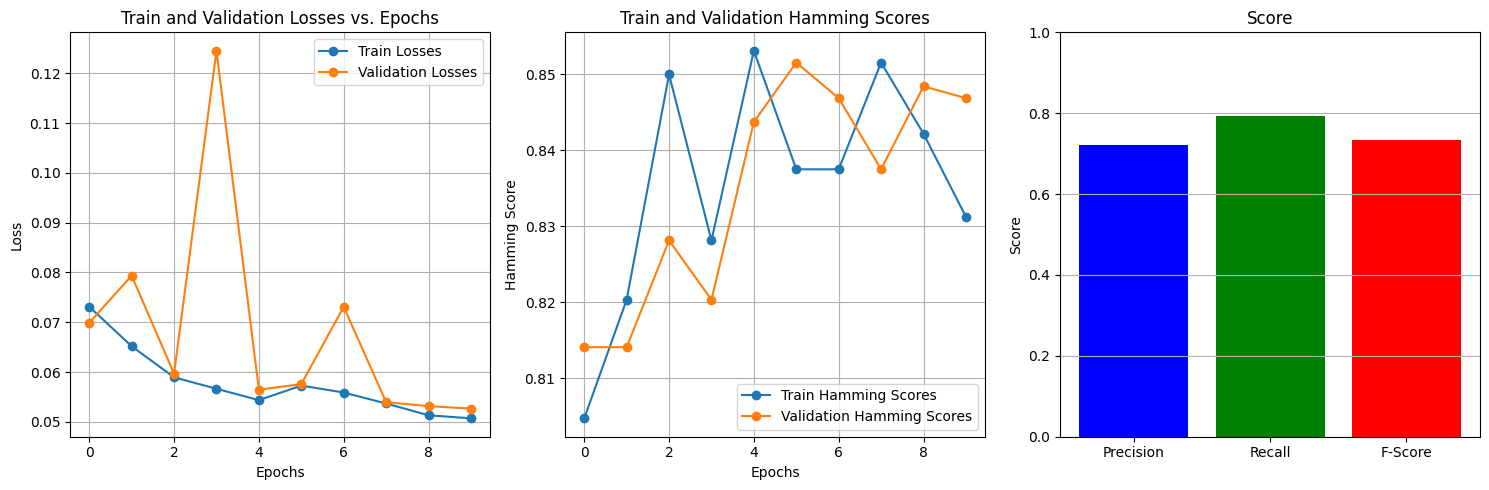

batch Size = 64 | learning Rate = 0.01 | num_features = 512 | drop out = 0.5


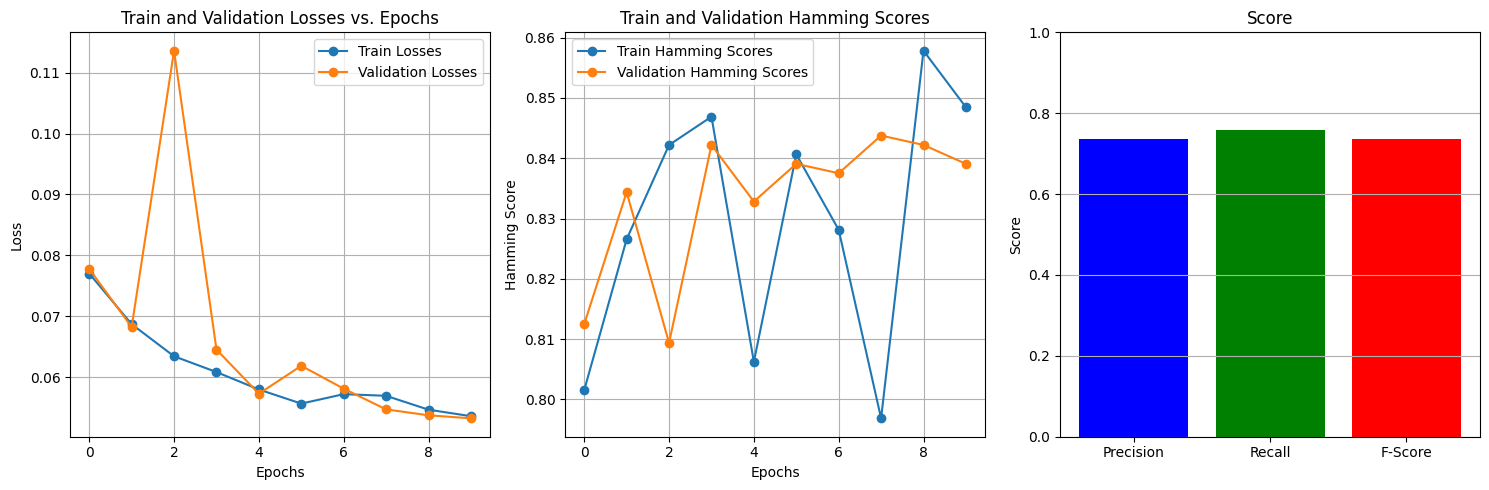

batch Size = 64 | learning Rate = 0.01 | num_features = 1024 | drop out = 0.2


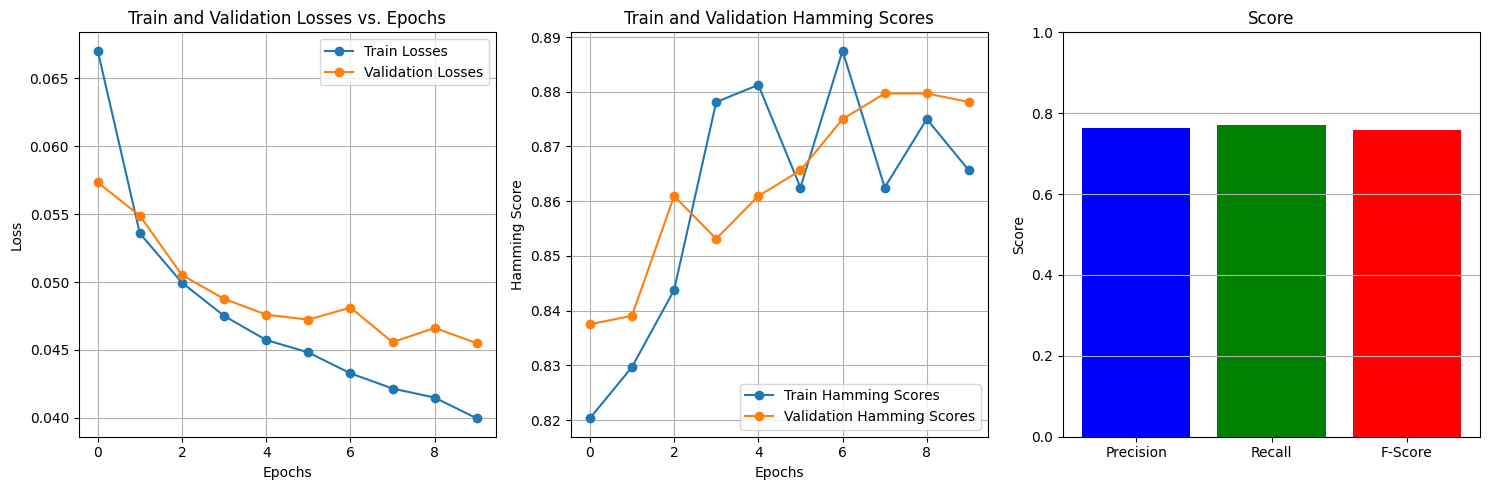

batch Size = 64 | learning Rate = 0.01 | num_features = 1024 | drop out = 0.5


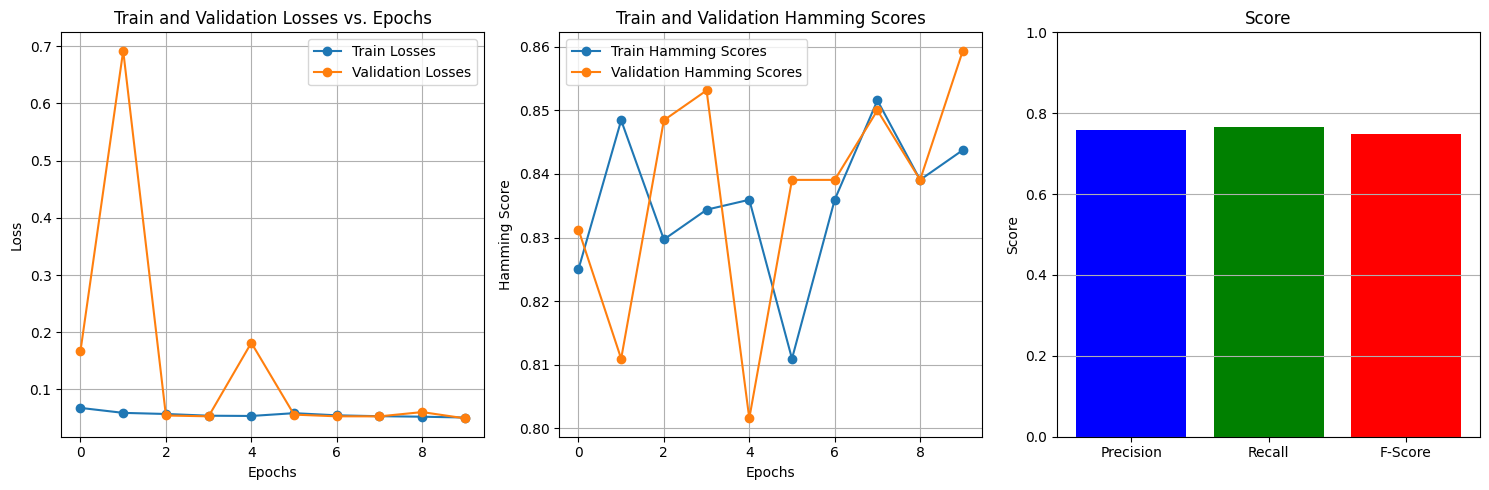

batch Size = 64 | learning Rate = 0.001 | num_features = 512 | drop out = 0.2


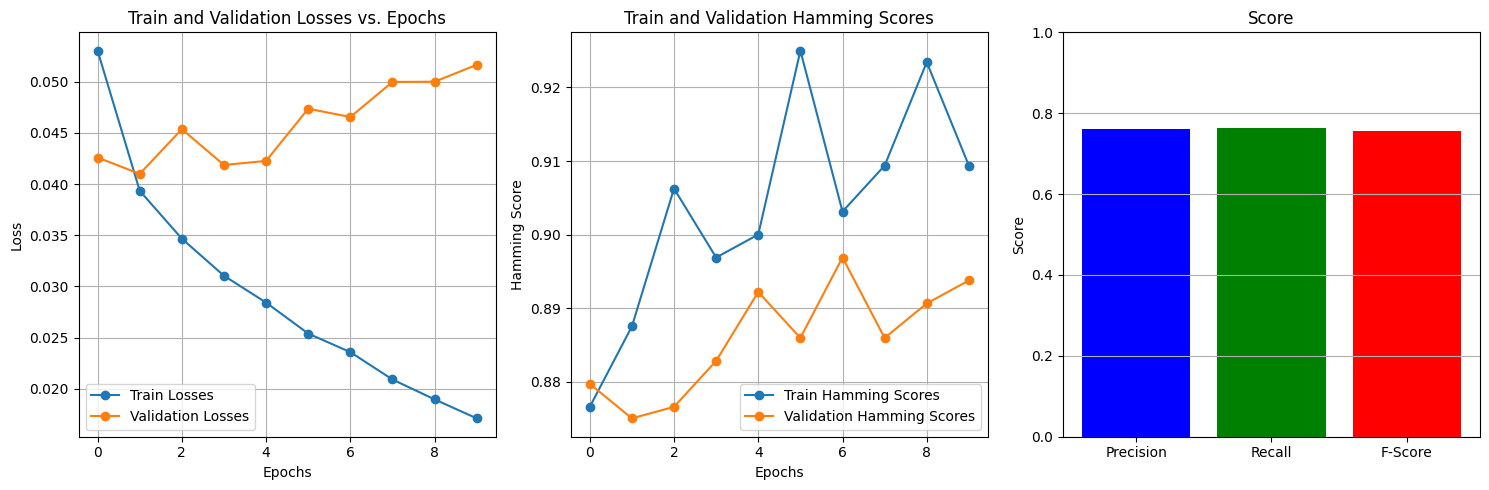

batch Size = 64 | learning Rate = 0.001 | num_features = 512 | drop out = 0.5


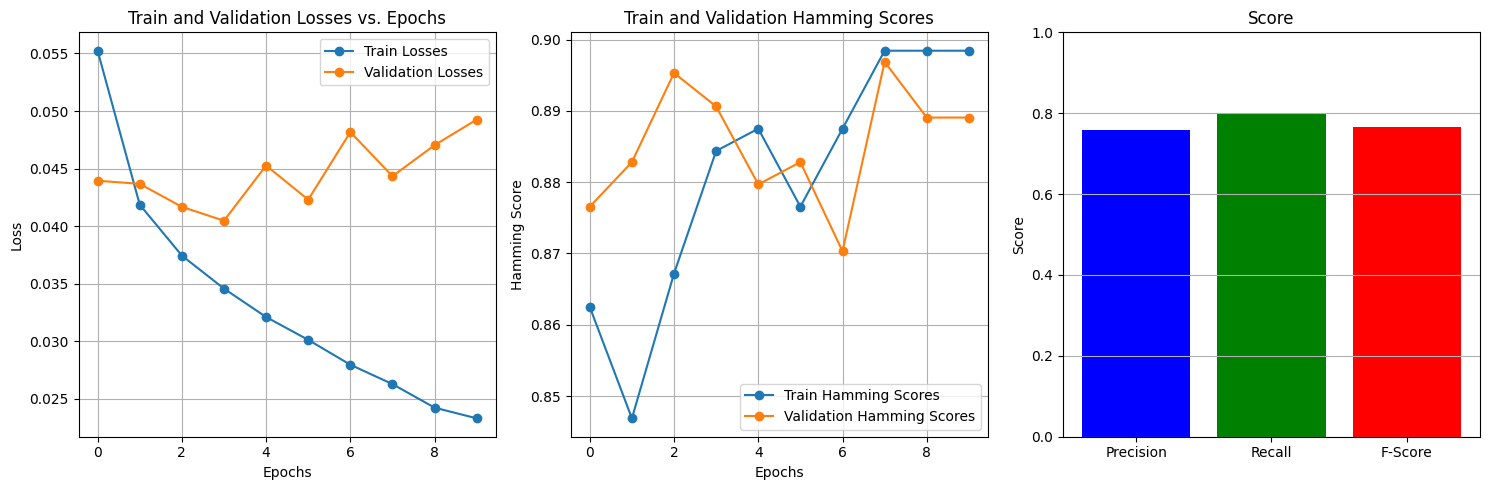

batch Size = 64 | learning Rate = 0.001 | num_features = 1024 | drop out = 0.2


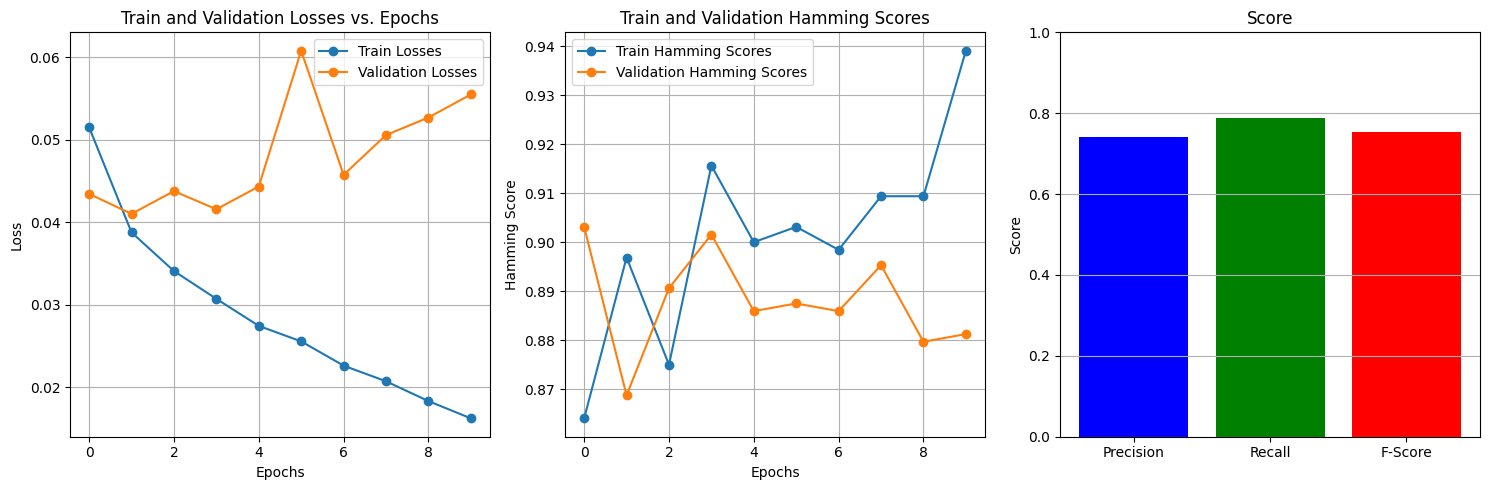

batch Size = 64 | learning Rate = 0.001 | num_features = 1024 | drop out = 0.5


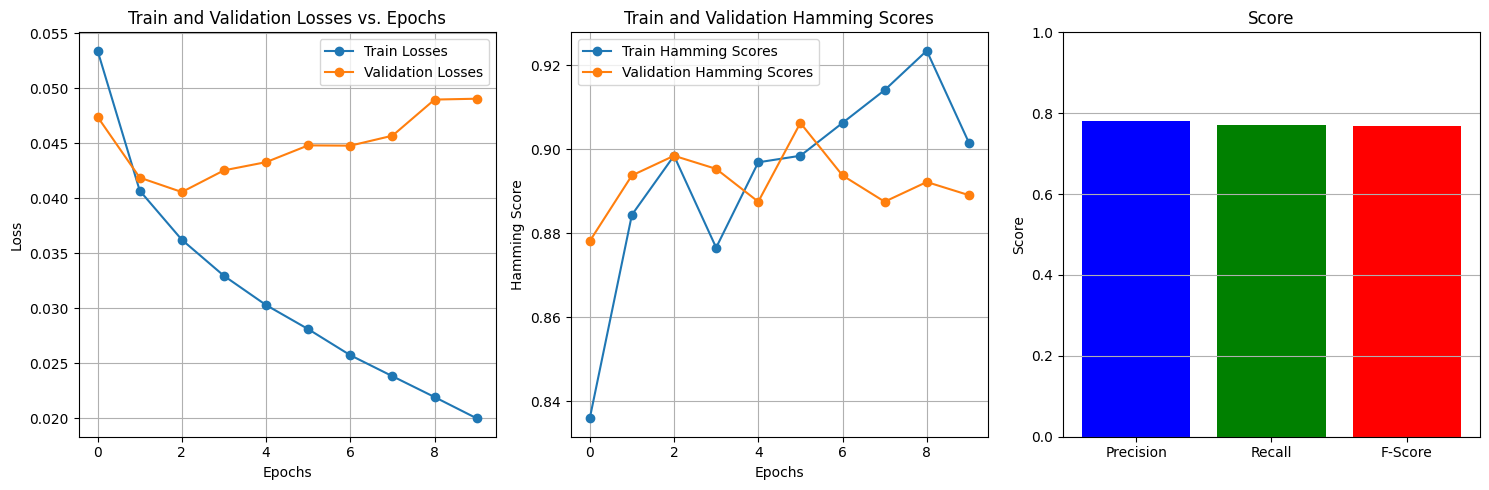

batch Size = 128 | learning Rate = 0.01 | num_features = 512 | drop out = 0.2


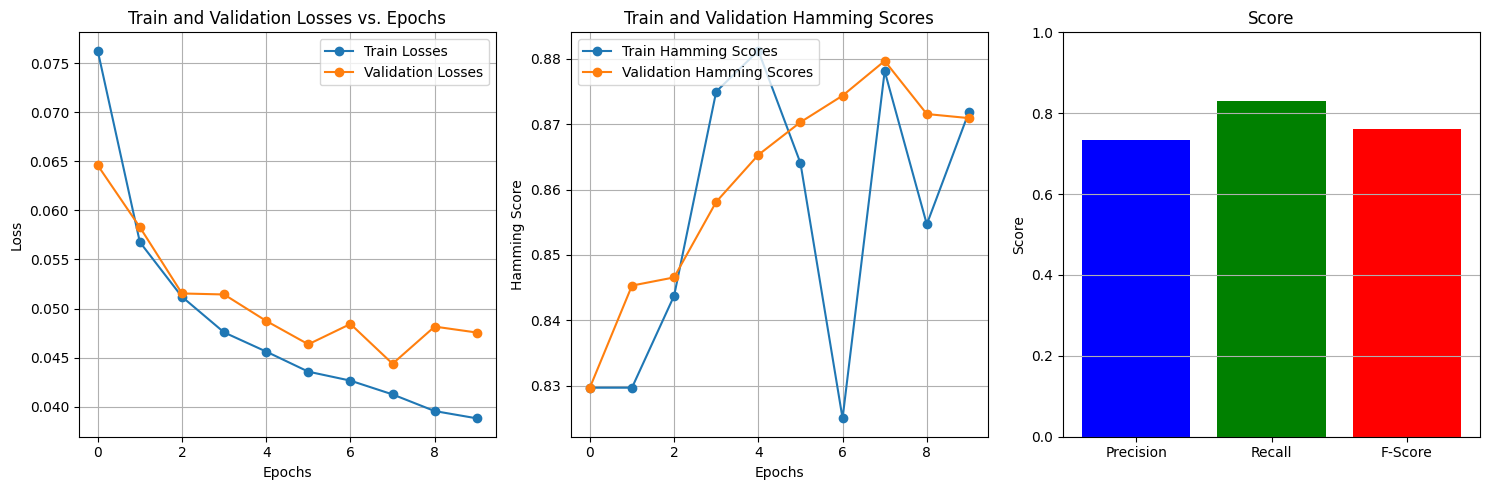

batch Size = 128 | learning Rate = 0.01 | num_features = 512 | drop out = 0.5


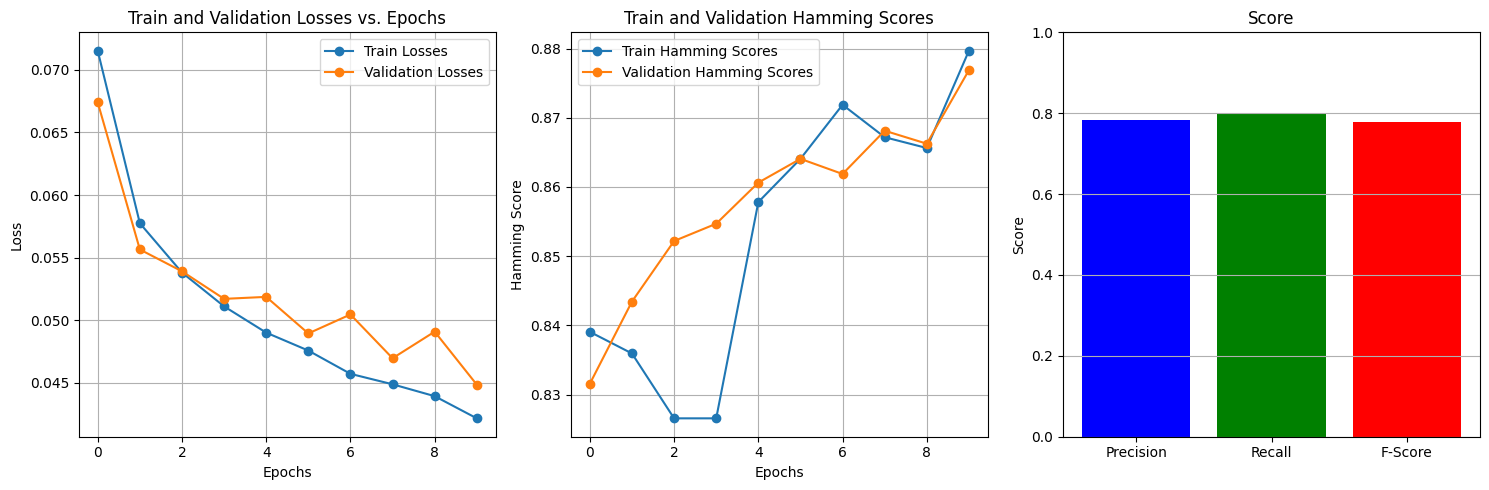

batch Size = 128 | learning Rate = 0.01 | num_features = 1024 | drop out = 0.2


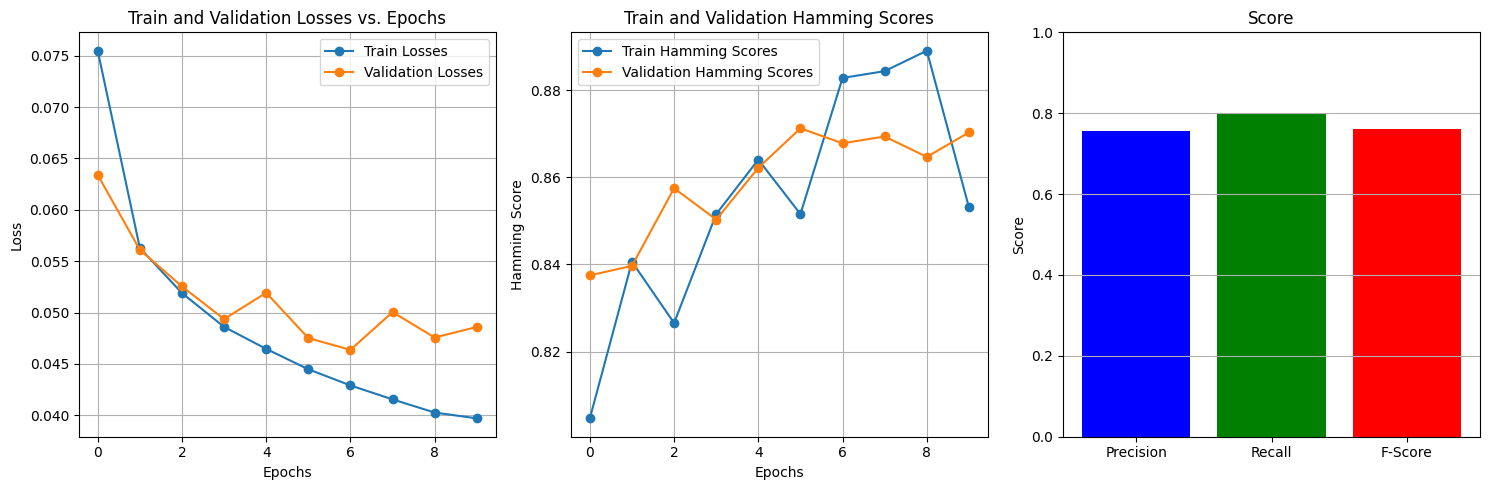

batch Size = 128 | learning Rate = 0.01 | num_features = 1024 | drop out = 0.5


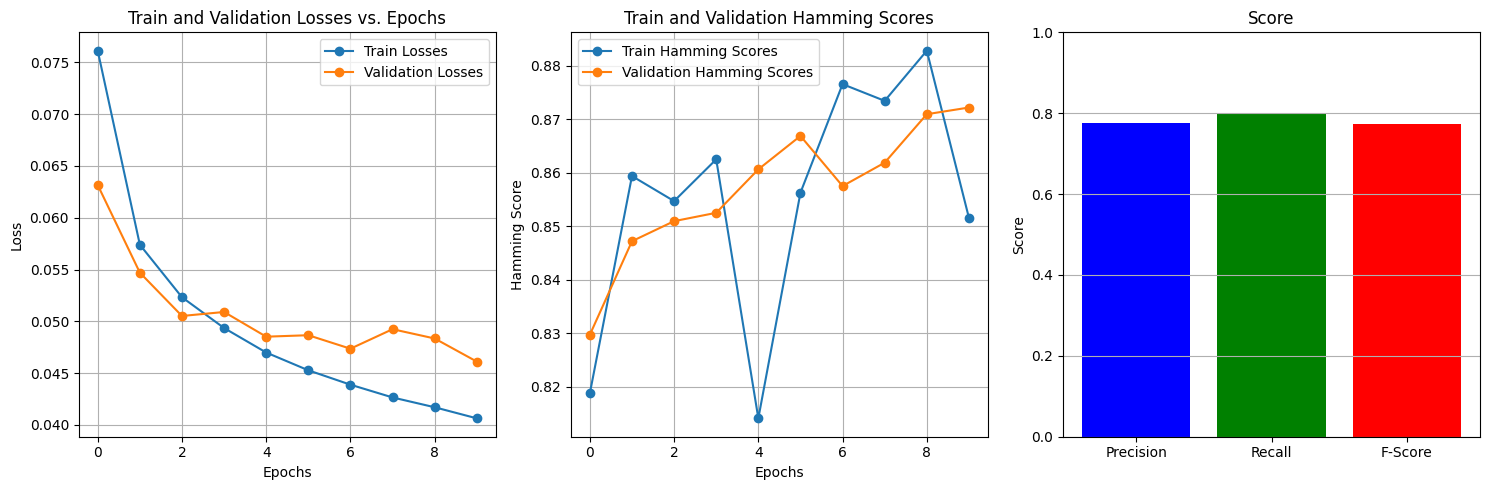

batch Size = 128 | learning Rate = 0.001 | num_features = 512 | drop out = 0.2


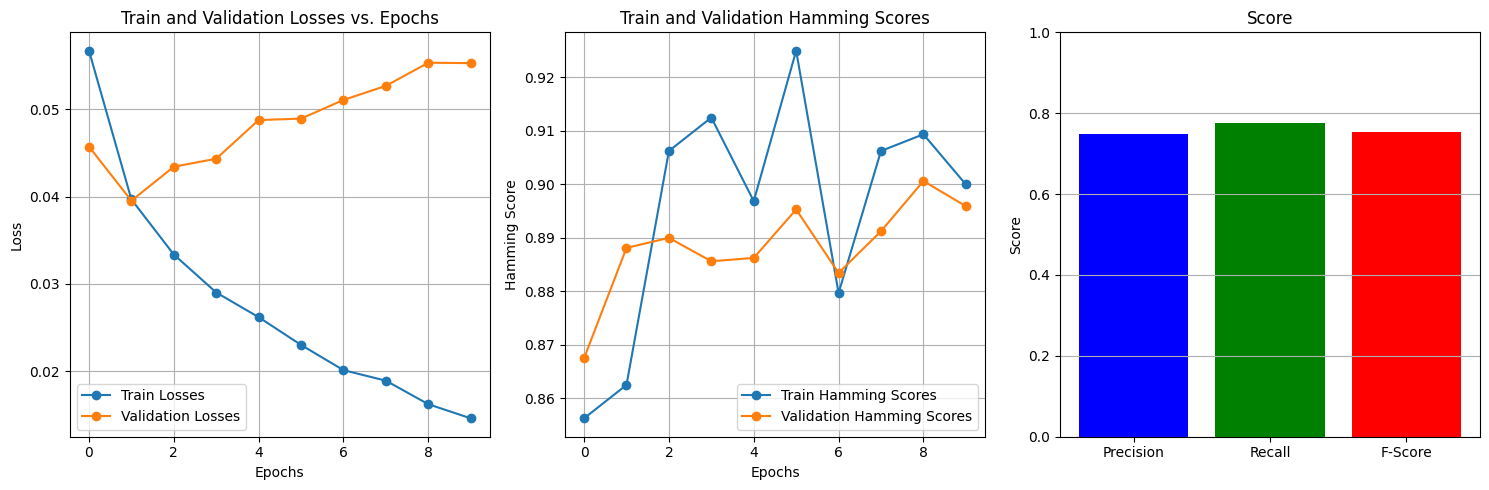

batch Size = 128 | learning Rate = 0.001 | num_features = 512 | drop out = 0.5


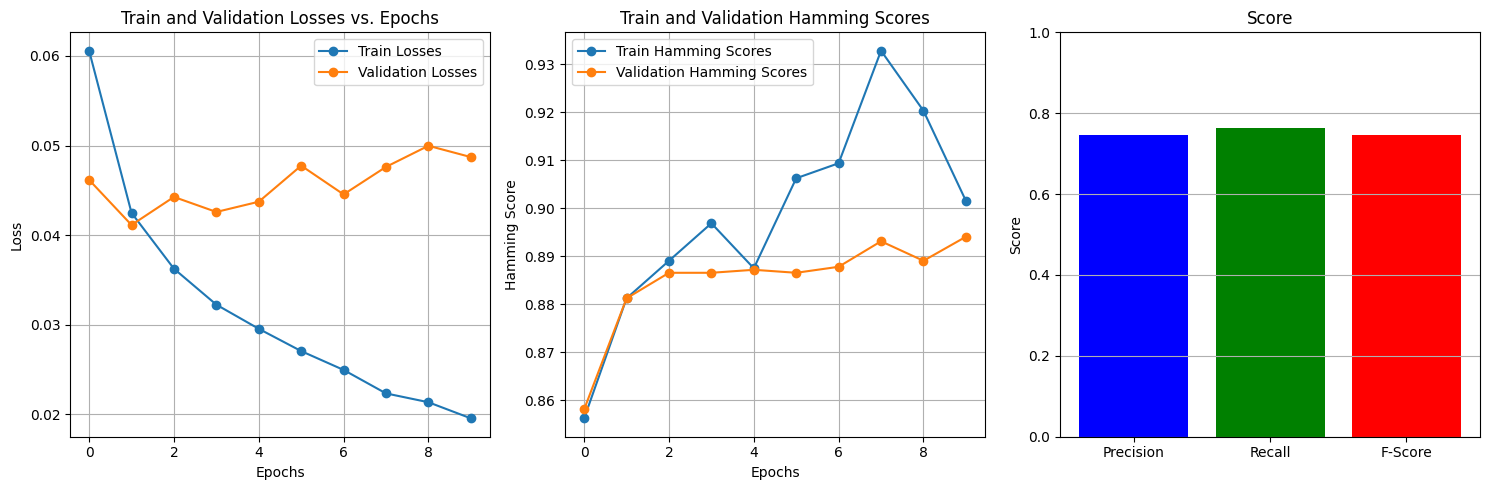

batch Size = 128 | learning Rate = 0.001 | num_features = 1024 | drop out = 0.2


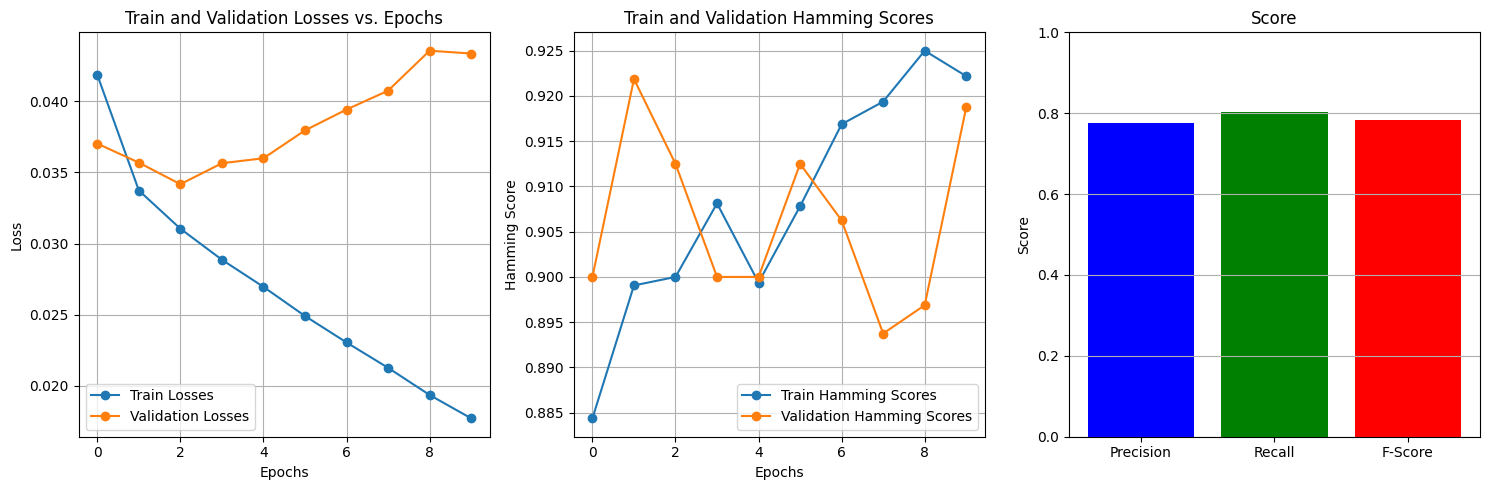

batch Size = 128 | learning Rate = 0.001 | num_features = 1024 | drop out = 0.5


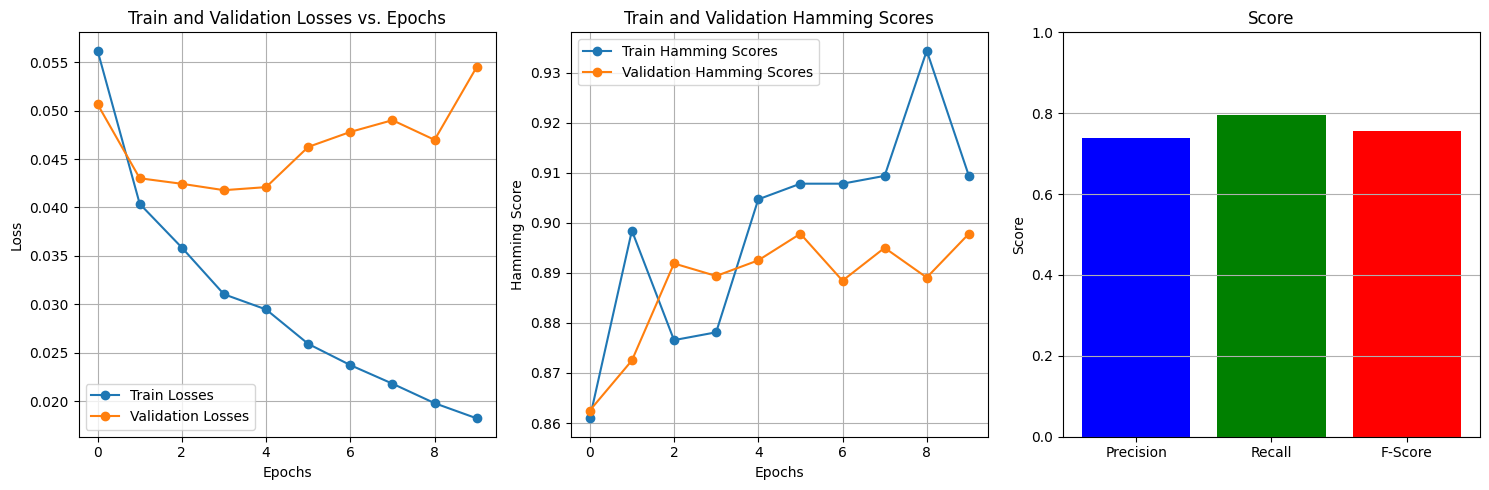

In [88]:
import json

with open('data.json', 'r') as file:
    data = json.load(file)
    
name_models = list(data.keys())

for name_ in name_models:
    parts = name_.split('_')
    batch_size = parts[1]
    learning_rate = parts[2]
    num_features = parts[3]
    dropout = parts[4].replace('.pth','')
    print(f'batch Size = {batch_size} | learning Rate = {learning_rate} | num_features = {num_features} | drop out = {dropout}')
    train_losses, train_hamming_scores, val_losses, val_hamming_scores = data[name_][0]
    precision, recall, f_score = data[name_][1]
    plot_evaluation(train_losses, train_hamming_scores, val_losses, val_hamming_scores, precision, recall, f_score)

Through the fine-tuning process, we have carefully evaluated and identified the model that best suits our needs for deployment and testing with external datasets.

Based on the charts, we will use the model with the following parameters: batch size = 128, learning rate = 0.001, num_features = 1024, dropout = 0.2

## 3.7. Testing Model

In [106]:
import torch
def model_load(num_features, dropout_prob, device, name):
    Model = resnet50(weights=ResNet50_Weights.DEFAULT)
    Model.fc = nn.Sequential(
        nn.Linear(Model.fc.in_features, num_features),
        nn.ReLU(inplace=True),
        nn.Dropout(dropout_prob),
        nn.Linear(num_features, 40)
    )
    Model = Model.to(device)
    Model.load_state_dict(torch.load(name))
    return Model
Model = model_load(1024, 0.2, 'device', 'CelebA_128_0.001_1024_0.2.pth')

In [107]:
from PIL import Image
import torch.nn.functional as F
def predict(image_path):
    Model.eval()
    image = Image.open(image_path).convert("RGB")
    image_tensor = data_transform(image)
    image_tensor = image_tensor.unsqueeze(0)  
    image_tensor = image_tensor.to(device) 
    with torch.no_grad():
        output = Model(image_tensor)
    probabilities = F.softmax(output, dim=1)
    predicted_classes = torch.zeros_like(probabilities, dtype=torch.int)
    threshold = 0.3 # 0.5 
    predicted_classes[probabilities >= threshold] = 1
    predicted = predicted_classes[0].cpu().tolist()
    plt.imshow(image)
    for ind in range(40):
        if predicted[ind] == 1:
            print(train_dataset.classes[ind])

Let's test on some image of Vietnamese celebrities

5_o_Clock_Shadow
Attractive
Big_Lips
Big_Nose
Black_Hair
Bushy_Eyebrows
Male
Mouth_Slightly_Open
Narrow_Eyes
No_Beard
Pointy_Nose
Smiling
Straight_Hair
Young


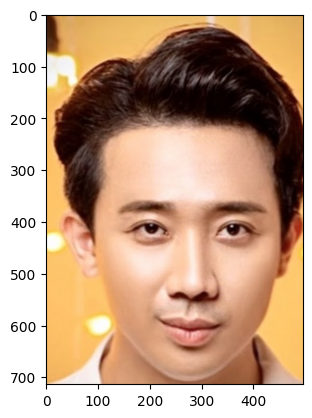

In [107]:
predict(r"Z:\ndm\note\test\1.jpg")

Bags_Under_Eyes
Big_Nose
Goatee
Gray_Hair
Male
Mustache
Sideburns


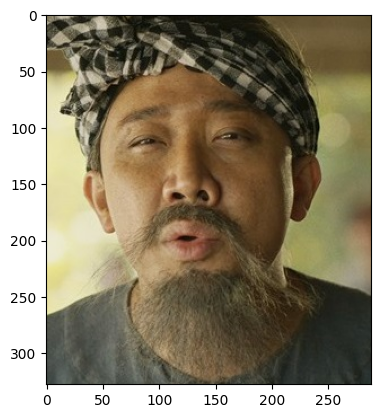

In [108]:
predict(r"Z:\ndm\note\test\2.jpg")

Big_Nose
Black_Hair
Bushy_Eyebrows
Eyeglasses
High_Cheekbones
Male
No_Beard
Pointy_Nose
Wavy_Hair
Young


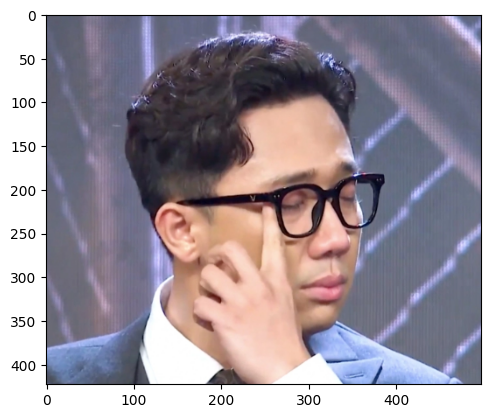

In [99]:
predict(r"Z:\ndm\note\test\3.png")

Attractive
High_Cheekbones
Narrow_Eyes
No_Beard
Receding_Hairline
Smiling
Wearing_Earrings
Wearing_Lipstick
Wearing_Necklace
Young


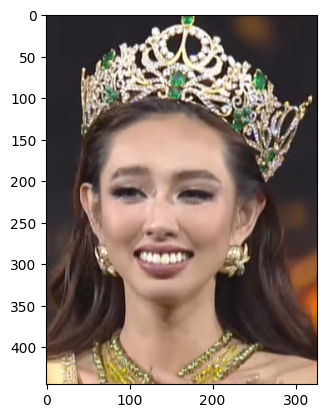

In [100]:
predict(r"Z:\ndm\note\test\5.png")

# 4. Conclusion

<ol>
<li>Through the training and experimentation process, it has been demonstrated that this dataset is highly suitable for facial recognition purposes, particularly for security and surveillance applications, or for extracting features for image processing tasks.</li>
<br>
<li> Although the training processes resulted in a reduction of the dataset by 40% compared to the original dataset, experimental results still show that the model performs well in real-world scenarios.</li>
<br>
<li> If there is a desire to further improve the model or embark on larger projects, it is advisable to utilize the entire dataset to optimize performance. </li>
</ol>